# Assignment 2

## *The adverse health effects of air pollution - are we making any progress?*

<p><img src=files/air.jpg width="900"></p>
<p><strong>Credit:</strong>  <a href="https://www.flickr.com/people/44221799@N08/">Flickr/E4C</a> </p>

In [2]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

<h2>Introduction</h2>
<p><strong>Business Context.</strong> Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as <em>coal</em>. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      </p>
<p>For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of <strong>plausible impacts of air contamination on the health of the global population</strong>. They have gathered some <em>raw</em> data provided by the <a href="https://www.who.int/">World Health Organization</a>, <a href="http://www.healthdata.org/">The Institute for Health Metrics and Evaluation</a> and the <a href="https://www.worldbank.org/">World Bank Group</a>. Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. </p>
<p><strong>Analytical Context.</strong> You are given a folder, named <code>files</code> with <em>raw</em> data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:</p>
<ol>
<li>Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. </li>
<li>Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.</li>
</ol>
<p>Additionally, the client has some broad questions they would like to answer:<br />
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?<br />
2. Which are the critical regions where we should start environmental campaigns?<br />
3. Are we making any progress in the prevention of deaths related to air pollution?<br />
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </p>

<h2>Extracting and cleaning relevant data</h2>
<p>Let's take a look at the data provided by the client in the <code>files</code> folder. There, we see another folder  named <code>WDI_csv</code> with several CSV files corresponding to the World Bank's primary <a href="https://datacatalog.worldbank.org/dataset/world-development-indicators">World Development Indicators</a>. The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. </p>
<p>Let's take a peek at the file <code>WDIData.csv</code>:</p>

In [3]:
WDI_data = pd.read_csv("./files/WDI_csv/WDIData.csv")
print(WDI_data.columns)
print(WDI_data.info())
WDI_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377256 entries, 0 to 377255
Data columns (total 65 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    377256 non-null  object 
 1   Country Code    377256 non-null  object 
 2   Indicator Name  377256 non-null  object 
 3   Indicator Co

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


<p>The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say <code>Arab World</code>, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with <code>NaN</code> values for each year column.</p>
<p>Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file <code>WDISeries.csv</code> which seems to contain more information about the indicators:</p>

In [4]:
WDI_ids = pd.read_csv("./files/WDI_csv/WDISeries.csv")
print(WDI_ids.columns)
WDI_ids.head()

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


<p>Bingo! The <code>WDI_ids</code> DataFrame contains a column named <code>Topic</code>. Moreover, it seems that <em>Environment</em> is listed as a key topic in the column.</p>

<h3>Exercise 1:</h3>
<p>Extract all the rows that have the topic key <em>Environment</em> in <code>WDI_ids</code>. Add to the resulting DataFrame a new column named <code>Subtopic</code> which contains the corresponding subtopic of the indicator. For example, the subtopic of <code>Environment: Agricultural production</code> is <code>Agricultural production</code>. Which subtopics do you think are of interest to us?</p>
<p><strong>Hint:</strong> Remember that you can apply string methods to Series using the <code>str()</code> method of <code>pandas</code>. </p>

**Answer.**

In [223]:
environment_filter = WDI_ids['Topic'].str.contains('Environment')
WDI_ids = WDI_ids[environment_filter]

WDI_ids['Subtopic'] = WDI_ids['Topic'].str.split(':').str[1]
print(WDI_ids['Indicator Name'].unique().size)
WDI_ids.head()

0       True
1       True
2       True
3       True
4       True
        ... 
1322    True
1323    True
1324    True
1325    True
1326    True
Name: Topic, Length: 138, dtype: bool
138


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Subtopic
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Agricultural production
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,Agricultural production
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,Agricultural production
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Land use
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Land use


In [221]:
print(WDI_ids['Subtopic'].unique())

[' Agricultural production' ' Land use' ' Energy production & use'
 ' Emissions' ' Biodiversity & protected areas' ' Density & urbanization'
 ' Freshwater' ' Natural resources contribution to GDP']


In [222]:
print(WDI_ids['Indicator Name'].unique())

['Agricultural machinery, tractors'
 'Fertilizer consumption (% of fertilizer production)'
 'Fertilizer consumption (kilograms per hectare of arable land)'
 'Agricultural land (sq. km)' 'Agricultural land (% of land area)'
 'Arable land (hectares)' 'Arable land (hectares per person)'
 'Arable land (% of land area)' 'Land under cereal production (hectares)'
 'Permanent cropland (% of land area)'
 'Rural land area where elevation is below 5 meters (sq. km)'
 'Rural land area where elevation is below 5 meters (% of total land area)'
 'Urban land area where elevation is below 5 meters (sq. km)'
 'Urban land area where elevation is below 5 meters (% of total land area)'
 'Land area where elevation is below 5 meters (% of total land area)'
 'Forest area (sq. km)' 'Forest area (% of land area)'
 'Agricultural irrigated land (% of total agricultural land)'
 'Average precipitation in depth (mm per year)' 'Land area (sq. km)'
 'Rural land area (sq. km)' 'Urban land area (sq. km)'
 'Agricultural 

Emissions are the only subtopic that are of interest to us.

<h3>Exercise 2:</h3>
<p>Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame <code>Emissions_df</code>. How many emissions indicators are in the study?</p>

**Answer.**

In [6]:
emissions_filter = WDI_ids['Subtopic'].str.contains()
Emissions_df = WDI_data[WDI_data['Indicator Name'].isin(WDI_ids['Indicator Name'])]
print('The number of emission indicators is {}'.format(Emissions_df['Indicator Name'].unique().size))
Emissions_df.head()

The number of emission indicators is 138


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN
5,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,95.939242,95.962166,96.352930,95.997833,96.649916,96.834184,97.003974,NaN,NaN,NaN
59,Arab World,ARB,Agricultural irrigated land (% of total agricu...,AG.LND.IRIG.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Exercise 3:</h3>
<p>The DataFrame <code>Emissions_df</code> has one column per year of observation. Data in this form is usually referred to as data in <em>wide format</em>, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, <em>each observation will be represented by a single row</em>. Use the <code>pandas</code> function <a href="https://pandas.pydata.org/docs/reference/api/pandas.melt.html"><code>melt()</code></a> to reshape the <code>Emissions_df</code> data into <em>long format</em>. The resulting DataFrame should contain a pair of new columns named <code>Year</code> and <code>Indicator Value</code>:</p>

**Answer.**

In [7]:
Emissions_df = pd.melt(Emissions_df, id_vars=['Indicator Name','Country Name','Country Code','Indicator Code'], var_name='Year', value_name='Indicator Value')
Emissions_df

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Indicator Value
0,Access to clean fuels and technologies for coo...,Arab World,ARB,EG.CFT.ACCS.ZS,1960,NaN
1,Access to electricity (% of population),Arab World,ARB,EG.ELC.ACCS.ZS,1960,NaN
2,"Access to electricity, rural (% of rural popul...",Arab World,ARB,EG.ELC.ACCS.RU.ZS,1960,NaN
3,"Access to electricity, urban (% of urban popul...",Arab World,ARB,EG.ELC.ACCS.UR.ZS,1960,NaN
4,Agricultural irrigated land (% of total agricu...,Arab World,ARB,AG.LND.IRIG.AG.ZS,1960,NaN
...,...,...,...,...,...,...
2222347,Urban population,Zimbabwe,ZWE,SP.URB.TOTL,Unnamed: 64,NaN
2222348,Urban population (% of total population),Zimbabwe,ZWE,SP.URB.TOTL.IN.ZS,Unnamed: 64,NaN
2222349,Urban population growth (annual %),Zimbabwe,ZWE,SP.URB.GROW,Unnamed: 64,NaN
2222350,Urban population living in areas where elevati...,Zimbabwe,ZWE,EN.POP.EL5M.UR.ZS,Unnamed: 64,NaN


<h3>Exercise 4:</h3>
<p>The column <code>Indicator Value</code> of the new <code>Emissions_df</code> contains a bunch of <code>NaN</code> values. Additionally, the <code>Year</code> column contains an <code>Unnamed: 64</code> value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.</p>

**Answer.**

In [8]:
Emissions_df = Emissions_df[Emissions_df['Year'] != 'Unnamed: 64']
Emissions_df.dropna(subset=['Indicator Value'], inplace=True)
Emissions_df = Emissions_df.reset_index(drop=True)

In [9]:
Emissions_df.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Indicator Value
0,Aquaculture production (metric tons),Arab World,ARB,ER.FSH.AQUA.MT,1960,4600.000000
1,Capture fisheries production (metric tons),Arab World,ARB,ER.FSH.CAPT.MT,1960,474880.000000
2,CO2 emissions (kt),Arab World,ARB,EN.ATM.CO2E.KT,1960,59535.396567
3,CO2 emissions (metric tons per capita),Arab World,ARB,EN.ATM.CO2E.PC,1960,0.645736
4,CO2 emissions from gaseous fuel consumption (%...,Arab World,ARB,EN.ATM.CO2E.GF.ZS,1960,5.041292


<h3>Exercise 5:</h3>
<p>Split the <code>Emissions_df</code> into two DataFrames, one containing only countries and the other containing only regions. Name these <code>Emissions_C_df</code> and <code>Emissions_R_df</code> respectively.</p>
<p><strong>Hint:</strong> You may want to inspect the file <code>WDICountry.csv</code> for this task. Region country codes may be found by looking at <code>null</code> values of the <code>Region</code> column in <code>WDICountry</code>.</p>

**Answer.**

In [10]:
WDICountry = pd.read_csv('./files/WDI_csv/WDICountry.csv')
WDICountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2010,NaN,NaN,Yes,NaN,NaN,2016.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,NaN,NaN


In [11]:
merge_df = WDICountry.merge(Emissions_df['Country Code'], on='Country Code')['Region']
Emissions_df['Region']=merge_df
Emissions_df.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Indicator Value,Region
0,Aquaculture production (metric tons),Arab World,ARB,ER.FSH.AQUA.MT,1960,4600.000000,Latin America & Caribbean
1,Capture fisheries production (metric tons),Arab World,ARB,ER.FSH.CAPT.MT,1960,474880.000000,Latin America & Caribbean
2,CO2 emissions (kt),Arab World,ARB,EN.ATM.CO2E.KT,1960,59535.396567,Latin America & Caribbean
3,CO2 emissions (metric tons per capita),Arab World,ARB,EN.ATM.CO2E.PC,1960,0.645736,Latin America & Caribbean
4,CO2 emissions from gaseous fuel consumption (%...,Arab World,ARB,EN.ATM.CO2E.GF.ZS,1960,5.041292,Latin America & Caribbean


In [12]:
Emissions_R_df = Emissions_df.drop('Country Name', axis=1)
Emissions_R_df.head()

,Indicator Name,Country Code,Indicator Code,Year,Indicator Value,Region
0,Aquaculture production (metric tons),ARB,ER.FSH.AQUA.MT,1960,4600.000000,Latin America & Caribbean
1,Capture fisheries production (metric tons),ARB,ER.FSH.CAPT.MT,1960,474880.000000,Latin America & Caribbean
2,CO2 emissions (kt),ARB,EN.ATM.CO2E.KT,1960,59535.396567,Latin America & Caribbean
3,CO2 emissions (metric tons per capita),ARB,EN.ATM.CO2E.PC,1960,0.645736,Latin America & Caribbean
4,CO2 emissions from gaseous fuel consumption (%...,ARB,EN.ATM.CO2E.GF.ZS,1960,5.041292,Latin America & Caribbean


In [13]:
Emissions_C_df = Emissions_df.drop('Region',axis=1)
Emissions_C_df.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Indicator Value
0,Aquaculture production (metric tons),Arab World,ARB,ER.FSH.AQUA.MT,1960,4600.000000
1,Capture fisheries production (metric tons),Arab World,ARB,ER.FSH.CAPT.MT,1960,474880.000000
2,CO2 emissions (kt),Arab World,ARB,EN.ATM.CO2E.KT,1960,59535.396567
3,CO2 emissions (metric tons per capita),Arab World,ARB,EN.ATM.CO2E.PC,1960,0.645736
4,CO2 emissions from gaseous fuel consumption (%...,Arab World,ARB,EN.ATM.CO2E.GF.ZS,1960,5.041292


<h2>Finalizing the cleaning for our study</h2>
<p>Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:</p>
<ul>
<li>
<p><strong>Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE</strong>: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.</p>
</li>
<li>
<p><strong>CO2 emissions (kt), EN.ATM.CO2E.KT</strong>: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.  </p>
</li>
<li>
<p><strong>Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE</strong>: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.</p>
</li>
<li>
<p><strong>Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE</strong>: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.</p>
</li>
<li>
<p><strong>Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE</strong>: Other pollutant gases.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3</strong>: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS</strong>: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.</p>
</li>
</ul>

<h3>Exercise 6:</h3>
<p>For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names <code>Total</code>, <code>CO2</code>, <code>CH4</code>, <code>N2O</code>, <code>Other</code>, <code>PM2.5</code>, and <code>PM2.5_WHO</code>. (This will be helpful later when we need to label plots of our data.) </p>

**Answer.**

In [14]:
print(Emissions_C_df.columns)

Index(['Indicator Name', 'Country Name', 'Country Code', 'Indicator Code',
       'Year', 'Indicator Value'],
      dtype='object')


In [15]:
replace_dict = {'EN.ATM.GHGT.KT.CE':'Total', 
                'EN.ATM.CO2E.KT': 'CO2', 
                'EN.ATM.METH.KT.CE':'CH4', 
                'EN.ATM.NOXE.KT.CE':'N2O',
               'EN.ATM.GHGO.KT.CE':'Other',
               'EN.ATM.PM25.MC.M3':'PM2.5',
               'EN.ATM.PM25.MC.ZS':'PM2.5_WHO'}
Emissions_C_df.replace({'Indicator Code': replace_dict}, inplace=True)

In [16]:
Emissions_C_df.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Indicator Value
0,Aquaculture production (metric tons),Arab World,ARB,ER.FSH.AQUA.MT,1960,4600.000000
1,Capture fisheries production (metric tons),Arab World,ARB,ER.FSH.CAPT.MT,1960,474880.000000
2,CO2 emissions (kt),Arab World,ARB,CO2,1960,59535.396567
3,CO2 emissions (metric tons per capita),Arab World,ARB,EN.ATM.CO2E.PC,1960,0.645736
4,CO2 emissions from gaseous fuel consumption (%...,Arab World,ARB,EN.ATM.CO2E.GF.ZS,1960,5.041292


In [17]:
Emissions_R_df.replace({'Indicator Code': replace_dict}, inplace=True)

In [18]:
Emissions_R_df.head()

,Indicator Name,Country Code,Indicator Code,Year,Indicator Value,Region
0,Aquaculture production (metric tons),ARB,ER.FSH.AQUA.MT,1960,4600.000000,Latin America & Caribbean
1,Capture fisheries production (metric tons),ARB,ER.FSH.CAPT.MT,1960,474880.000000,Latin America & Caribbean
2,CO2 emissions (kt),ARB,CO2,1960,59535.396567,Latin America & Caribbean
3,CO2 emissions (metric tons per capita),ARB,EN.ATM.CO2E.PC,1960,0.645736,Latin America & Caribbean
4,CO2 emissions from gaseous fuel consumption (%...,ARB,EN.ATM.CO2E.GF.ZS,1960,5.041292,Latin America & Caribbean


In [19]:
valid_indicator_codes = ['Total', 'CO2', 'CH4', 'N2O', 'Other', 'PM2.5', 'PM2.5_WHO']

# Filter the DataFrame to keep rows with valid indicator codes
Emissions_C_df = Emissions_C_df[Emissions_C_df['Indicator Code'].isin(valid_indicator_codes)]
Emissions_R_df = Emissions_R_df[Emissions_R_df['Indicator Code'].isin(valid_indicator_codes)]

In [20]:
Emissions_C_df.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Indicator Value
2,CO2 emissions (kt),Arab World,ARB,CO2,1960,5.953540e+04
16,CO2 emissions (kt),Caribbean small states,CSS,CO2,1960,5.878201e+03
30,CO2 emissions (kt),Central Europe and the Baltics,CEB,CO2,1960,4.665334e+05
58,CO2 emissions (kt),Early-demographic dividend,EAR,CO2,1960,5.821834e+05
87,CO2 emissions (kt),East Asia & Pacific,EAS,CO2,1960,1.210072e+06


In [21]:
Emissions_R_df.head()

,Indicator Name,Country Code,Indicator Code,Year,Indicator Value,Region
2,CO2 emissions (kt),ARB,CO2,1960,5.953540e+04,Latin America & Caribbean
16,CO2 emissions (kt),CSS,CO2,1960,5.878201e+03,Latin America & Caribbean
30,CO2 emissions (kt),CEB,CO2,1960,4.665334e+05,Latin America & Caribbean
58,CO2 emissions (kt),EAR,CO2,1960,5.821834e+05,Latin America & Caribbean
87,CO2 emissions (kt),EAS,CO2,1960,1.210072e+06,Latin America & Caribbean


<h2>Where shall the client start environmental campaigns?</h2>
<p>Now the DataFrames <code>Emissions_C_df</code> and <code>Emissions_R_df</code> seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.</p>

<h3>Exercise 7:</h3>
<p>Let's first calculate some basic information about the main indicators across the globe.</p>
<h4>7.1</h4>
<p>Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (<code>CO2, CH4, N2O, Others</code>) over the years. Use the <code>Emissions_C_df</code> data frame. What trends do you see? </p>

**Answer.**

In [22]:
print(Emissions_C_df['Year'].unique())
column_data_type = Emissions_C_df['Indicator Value'].dtype

if column_data_type == 'object':
    print("The values in the column are strings.")
elif pd.api.types.is_numeric_dtype(column_data_type):
    print("The values in the column are numeric.")
else:
    print("The data type is neither string nor numeric.")

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017']
The values in the column are numeric.


In [23]:
years_of_interest = ['2015', '2016', '2017']
indicator_codes_of_interest = ['CO2', 'N2O', 'CH4', 'Other']

# Create an empty dictionary to store the separate DataFrames
yearly_data = {}

# Loop through the years of interest and filter the data for each year
for year in years_of_interest:
    filtered_rows = Emissions_C_df[(Emissions_C_df['Year'] == year) & (Emissions_C_df['Indicator Code'].isin(indicator_codes_of_interest))]
    
    # Store the filtered data in the dictionary with the year as the key
    yearly_data[year] = filtered_rows

# Access each separate DataFrame by its year key
for year, df in yearly_data.items():
    print(f"Year: {year}")
    print(df.head())

Year: 2015
Empty DataFrame
Columns: [Indicator Name, Country Name, Country Code, Indicator Code, Year, Indicator Value]
Index: []
Year: 2016
Empty DataFrame
Columns: [Indicator Name, Country Name, Country Code, Indicator Code, Year, Indicator Value]
Index: []
Year: 2017
Empty DataFrame
Columns: [Indicator Name, Country Name, Country Code, Indicator Code, Year, Indicator Value]
Index: []


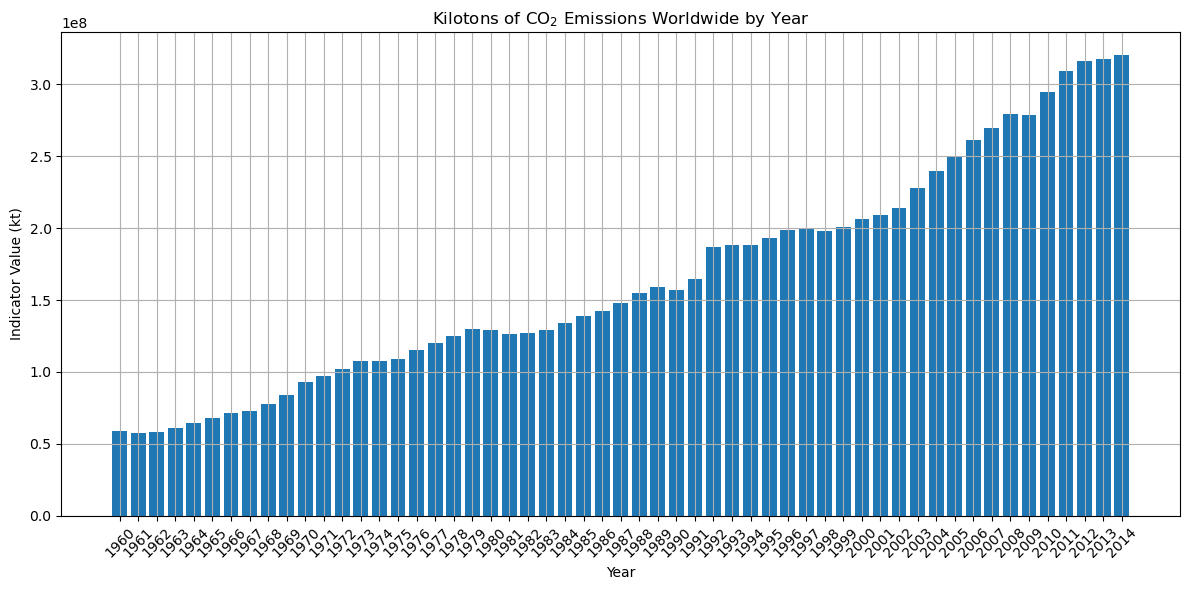

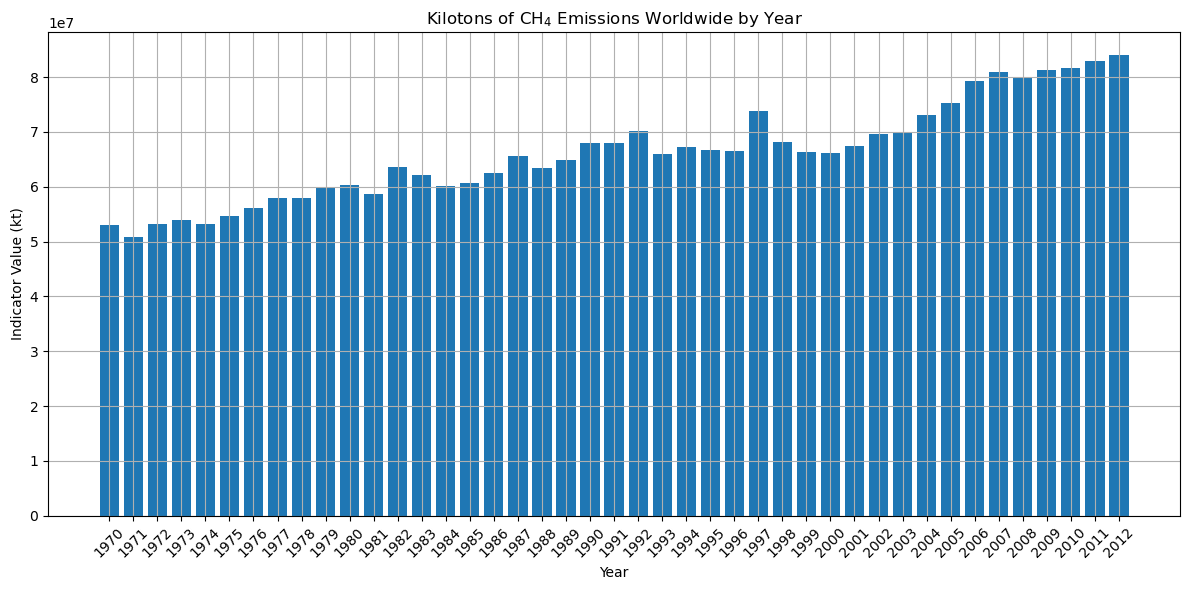

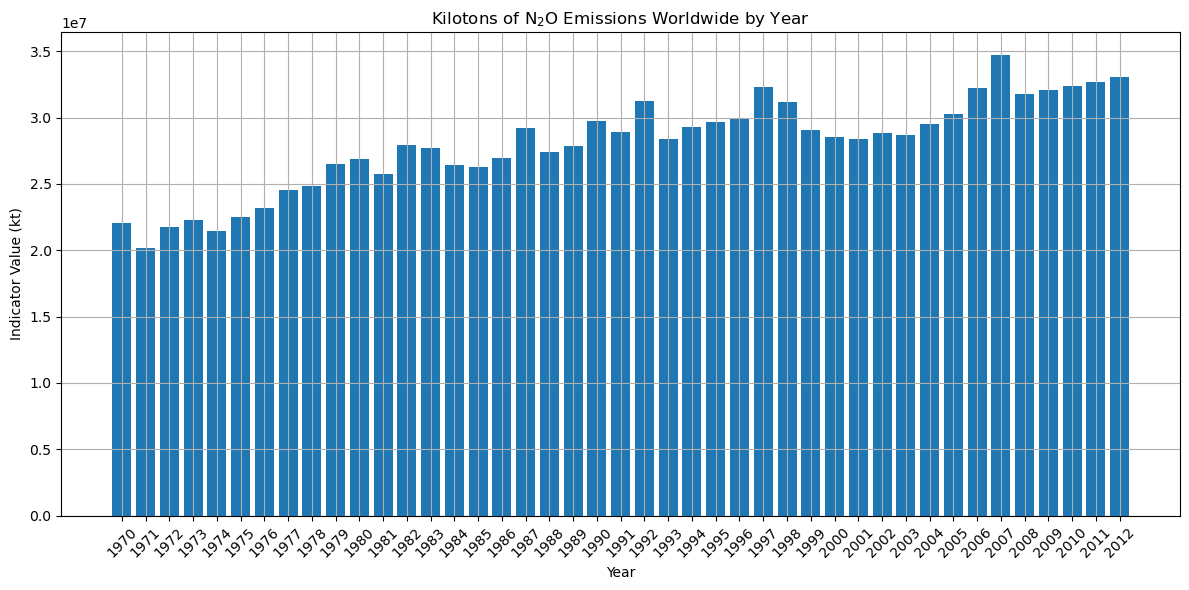

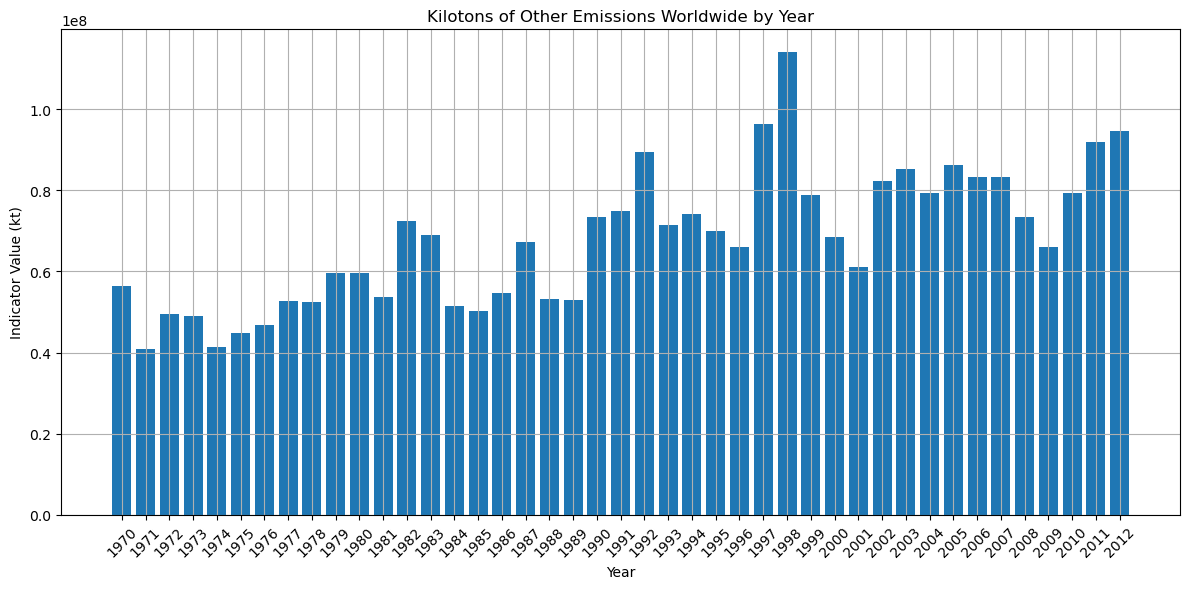

In [28]:
# Define the years of interest and indicator codes
years_of_interest = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
indicator_CO2 = ['CO2']
indicator_CH4 = ['CH4']
indicator_N2O = ['N2O']
indicator_Other = ['Other']
# Filter the DataFrame to include only the specified years and indicator codes
filtered_df = Emissions_C_df[(Emissions_C_df['Year'].isin(years_of_interest)) & (Emissions_C_df['Indicator Code'].isin(indicator_CO2))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CO$_2$ Emissions Worldwide by Year')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Filter the DataFrame to include only the specified years and indicator codes
filtered_df = Emissions_C_df[(Emissions_C_df['Year'].isin(years_of_interest)) & (Emissions_C_df['Indicator Code'].isin(indicator_CH4))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CH$_4$ Emissions Worldwide by Year')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Filter the DataFrame to include only the specified years and indicator codes
filtered_df = Emissions_C_df[(Emissions_C_df['Year'].isin(years_of_interest)) & (Emissions_C_df['Indicator Code'].isin(indicator_N2O))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of N$_2$O Emissions Worldwide by Year')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Filter the DataFrame to include only the specified years and indicator codes
filtered_df = Emissions_C_df[(Emissions_C_df['Year'].isin(years_of_interest)) & (Emissions_C_df['Indicator Code'].isin(indicator_Other))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of Other Emissions Worldwide by Year')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>7.2</h4>
<p>What can you say about the <em>distribution</em> of emissions around the globe over the years? What information can you extract from the <em>tails</em> of these distributions over the years?</p>

**Answer.**

The emissions for everything have been pretty much increasing, we can see this in all 4 of the plots. There is no data for 2015 and onwards for any of the main four emissions, and we see that emissions in 2013 and 2014 are drastically lower worldwide, because there is no data pertaining to CH$_4$, N$_2$O, and Other types of emissions for those years. CO$_2$ have been on a constant increase and has not slowed down, and is the greenhouse gas causing the most amount of pollution.

<h4>7.3</h4>
<p>Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the <code>Emissions_R_df</code> data frame. The main regions are <code>'Latin America &amp; Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe &amp; Central Asia', 'Middle East &amp; North Africa', 'East Asia &amp; Pacific'</code> and <code>'North America'</code>. What conclusions can you make?</p>

**Answer.**

In [30]:
print(Emissions_R_df.columns)

Index(['Indicator Name', 'Country Code', 'Indicator Code', 'Year',
       'Indicator Value', 'Region'],
      dtype='object')


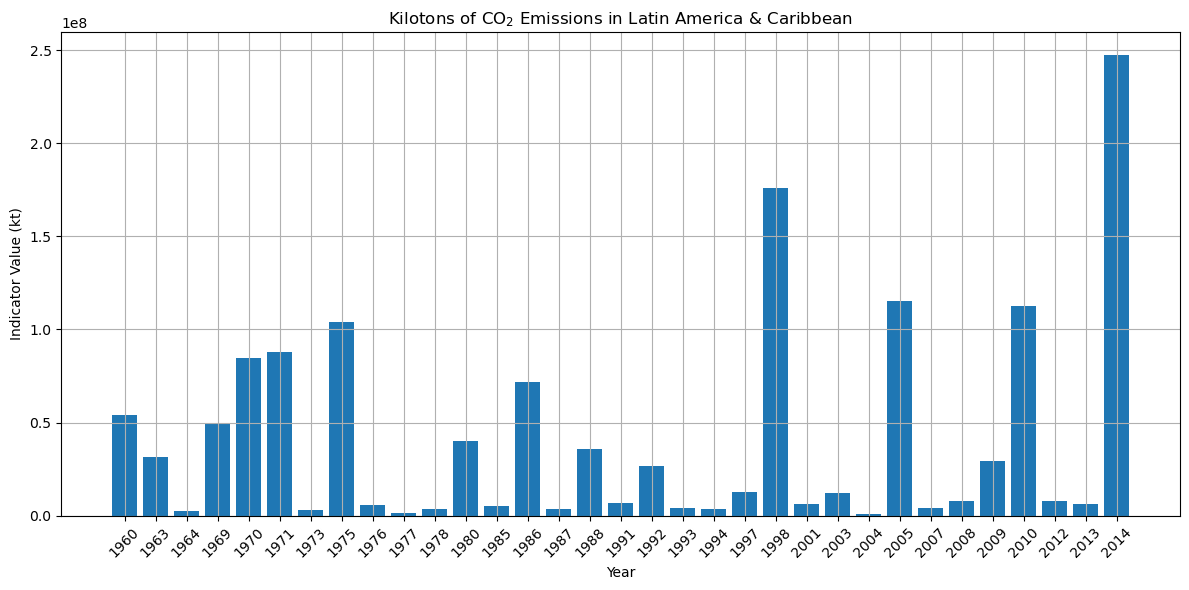

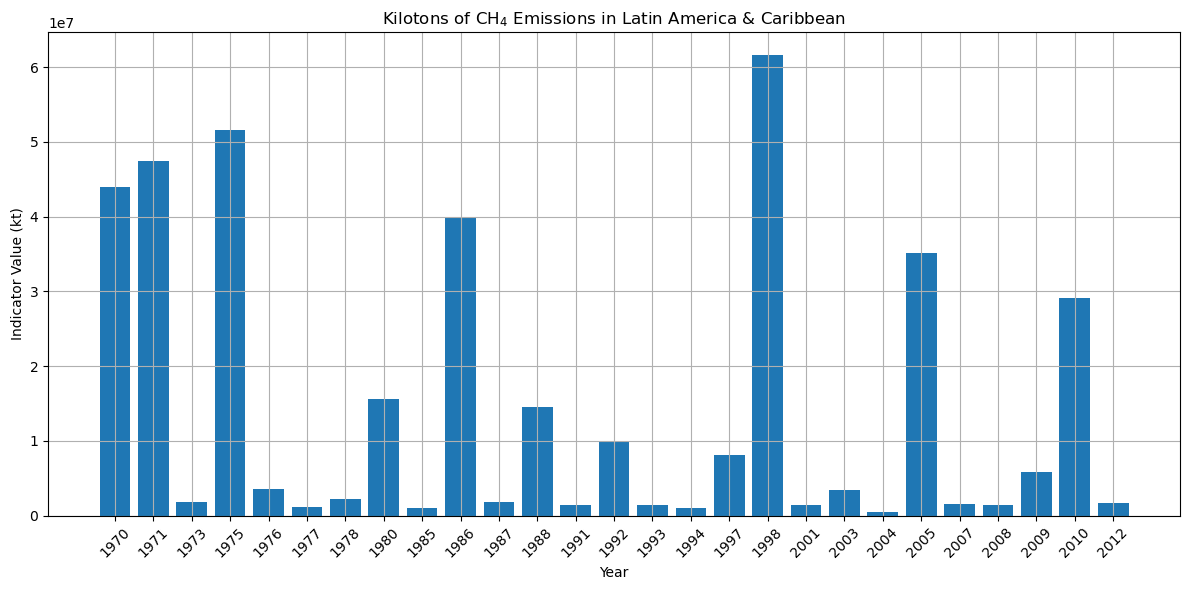

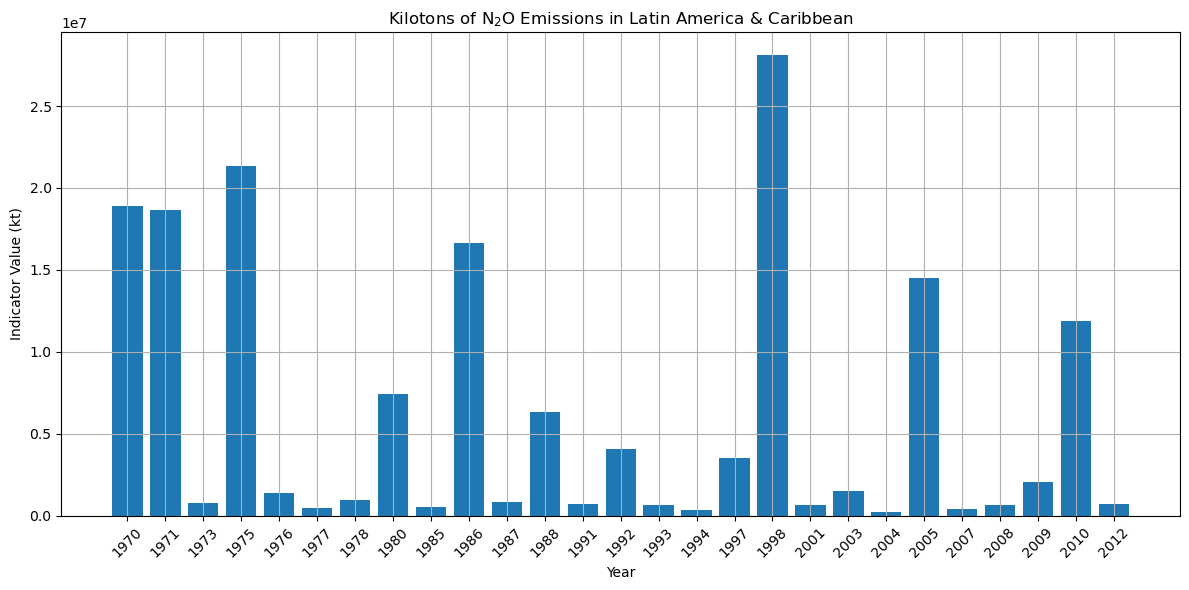

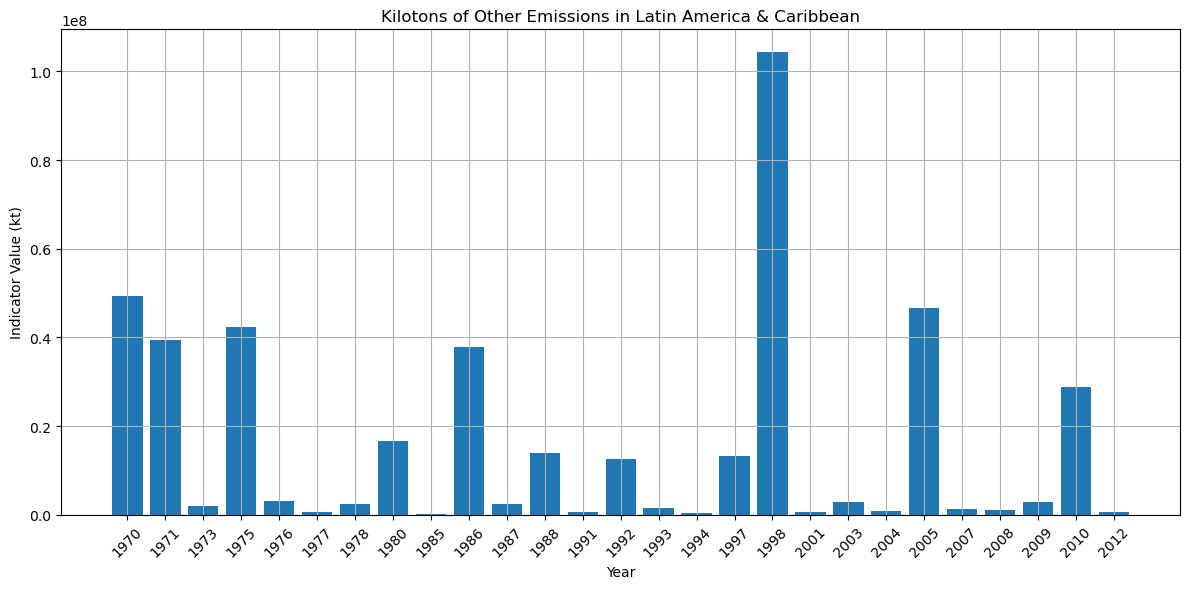

In [38]:
LAC = ['Latin America & Caribbean']
SA = ['South Asia']
SSA = ['Sub-Saharan Africa']
ECA = ['Europe & Central Asia']
MENA = ['Middle East & North Africa']
EAP = ['East Asia & Pacific']
NA = ['North America']

indicator_CO2 = ['CO2']
indicator_CH4 = ['CH4']
indicator_N2O = ['N2O']
indicator_Other = ['Other']

# LAC/CO2
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(LAC)) & (Emissions_R_df['Indicator Code'].isin(indicator_CO2))]
# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CO$_2$ Emissions in Latin America & Caribbean')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# LAC/CH4
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(LAC)) & (Emissions_R_df['Indicator Code'].isin(indicator_CH4))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CH$_4$ Emissions in Latin America & Caribbean')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# LAC/N2O
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(LAC)) & (Emissions_R_df['Indicator Code'].isin(indicator_N2O))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of N$_2$O Emissions in Latin America & Caribbean')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# LAC/Other
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(LAC)) & (Emissions_R_df['Indicator Code'].isin(indicator_Other))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of Other Emissions in Latin America & Caribbean')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

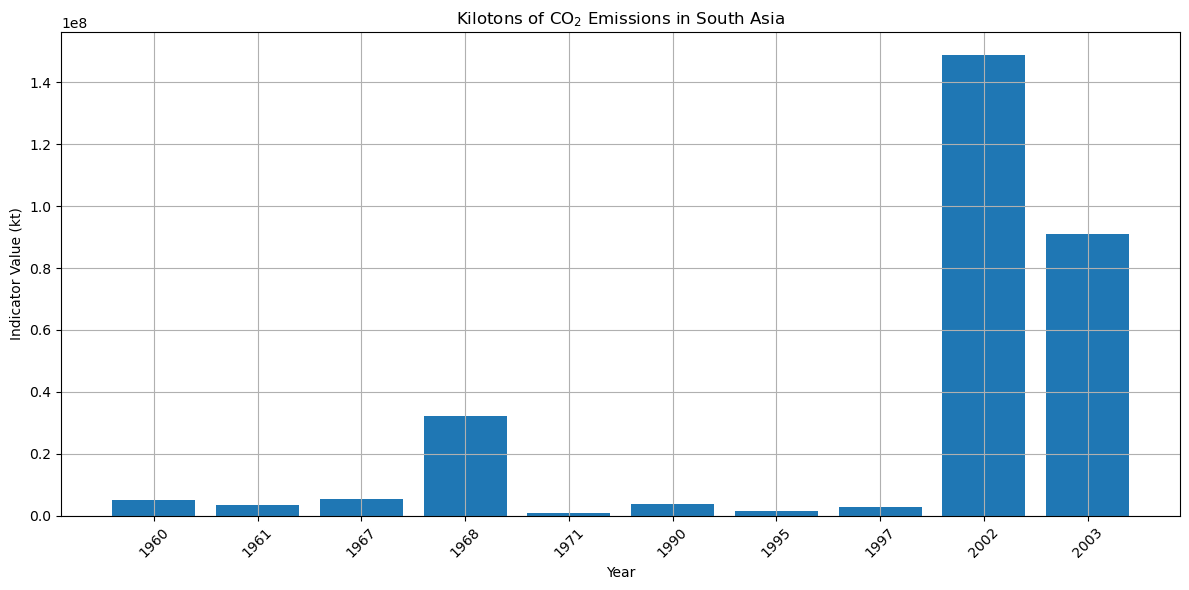

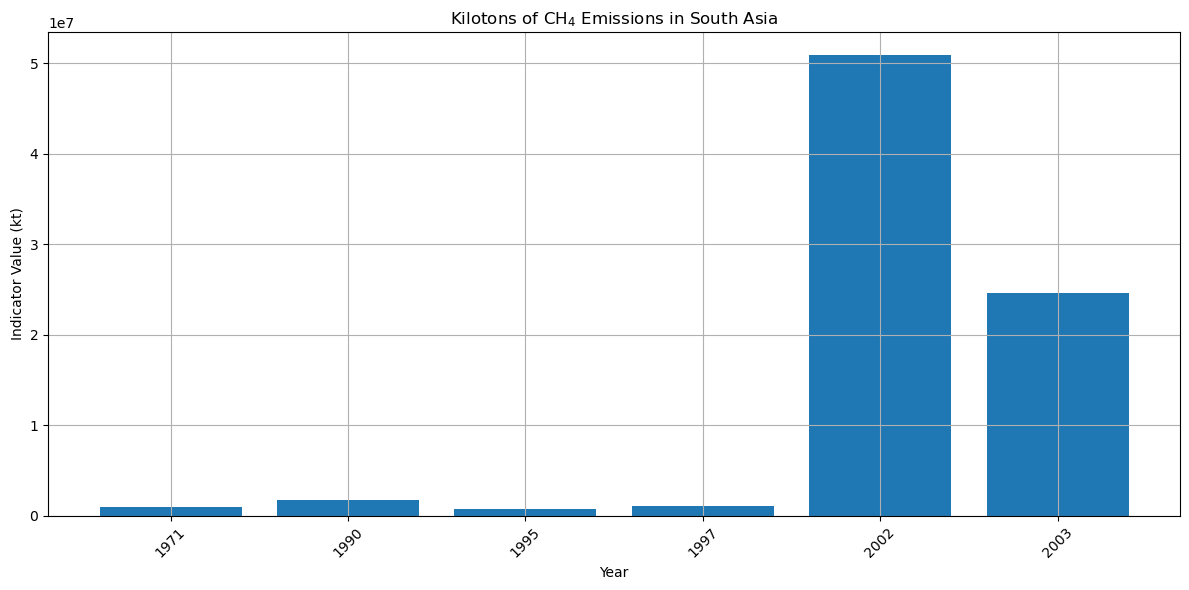

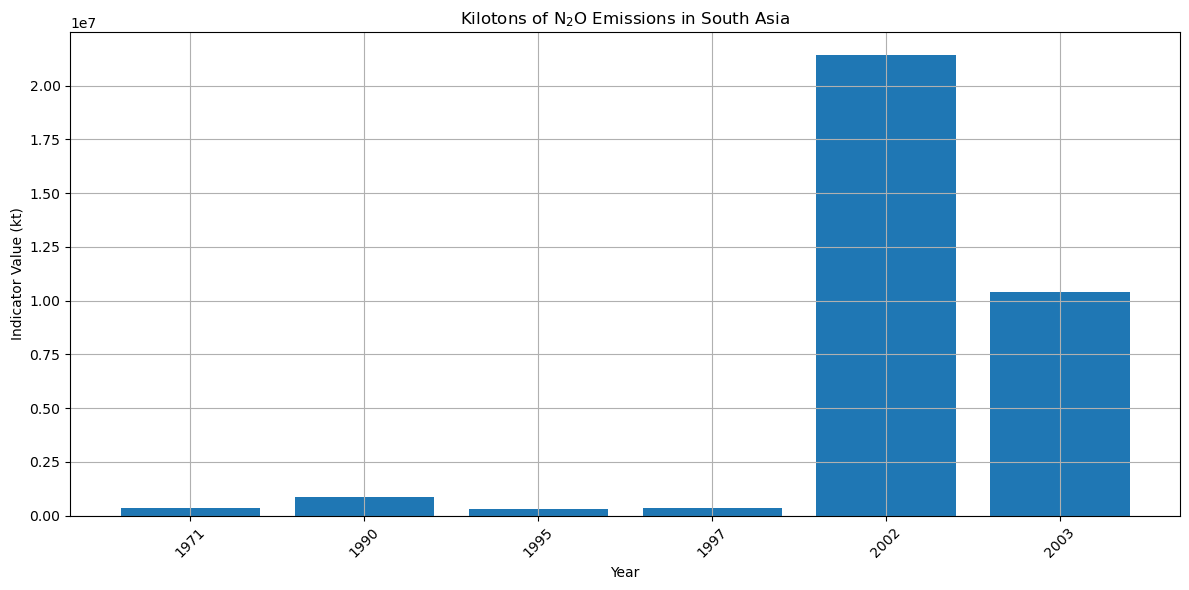

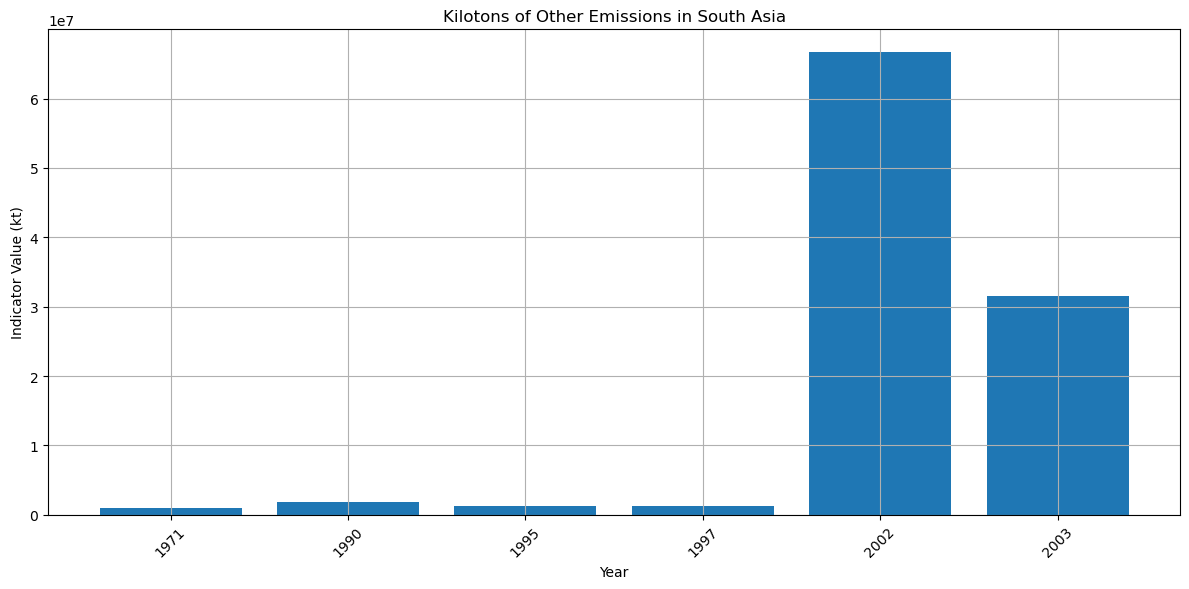

In [40]:
# SA/CO2
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(SA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CO2))]
# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CO$_2$ Emissions in South Asia')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SA/CH4
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(SA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CH4))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CH$_4$ Emissions in South Asia')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SA/N2O
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(SA)) & (Emissions_R_df['Indicator Code'].isin(indicator_N2O))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of N$_2$O Emissions in South Asia')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SA/Other
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(SA)) & (Emissions_R_df['Indicator Code'].isin(indicator_Other))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of Other Emissions in South Asia')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

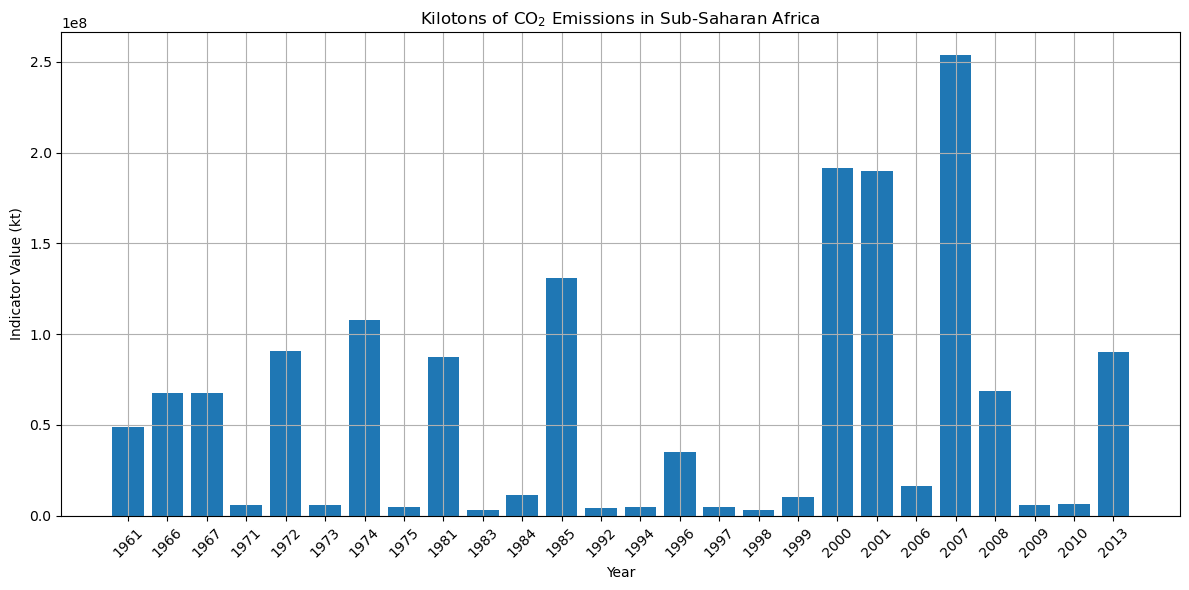

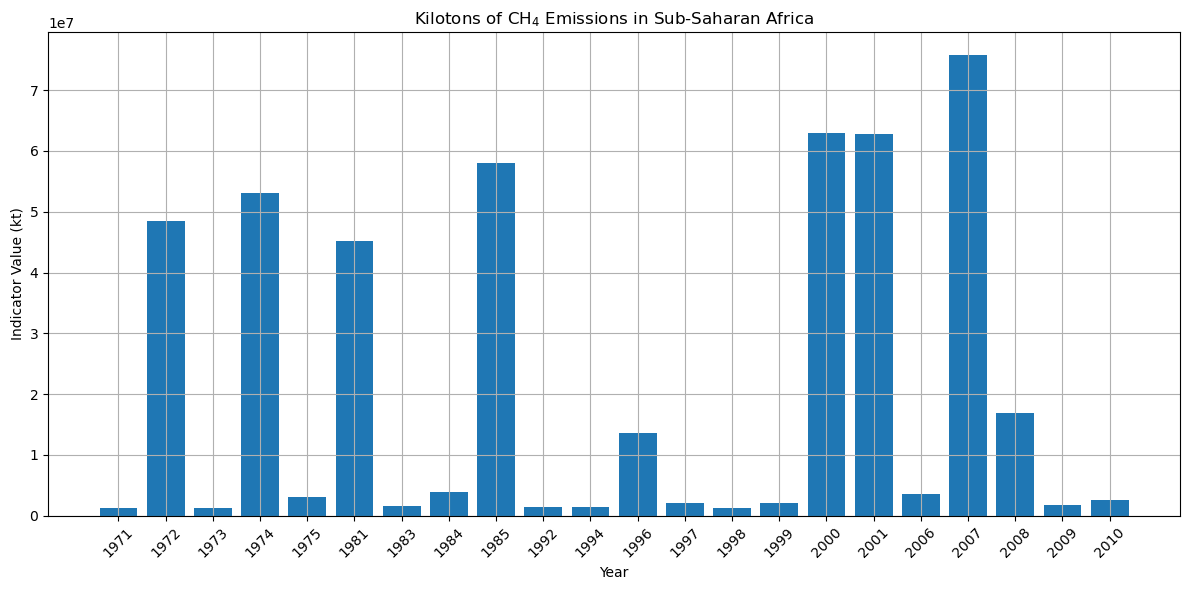

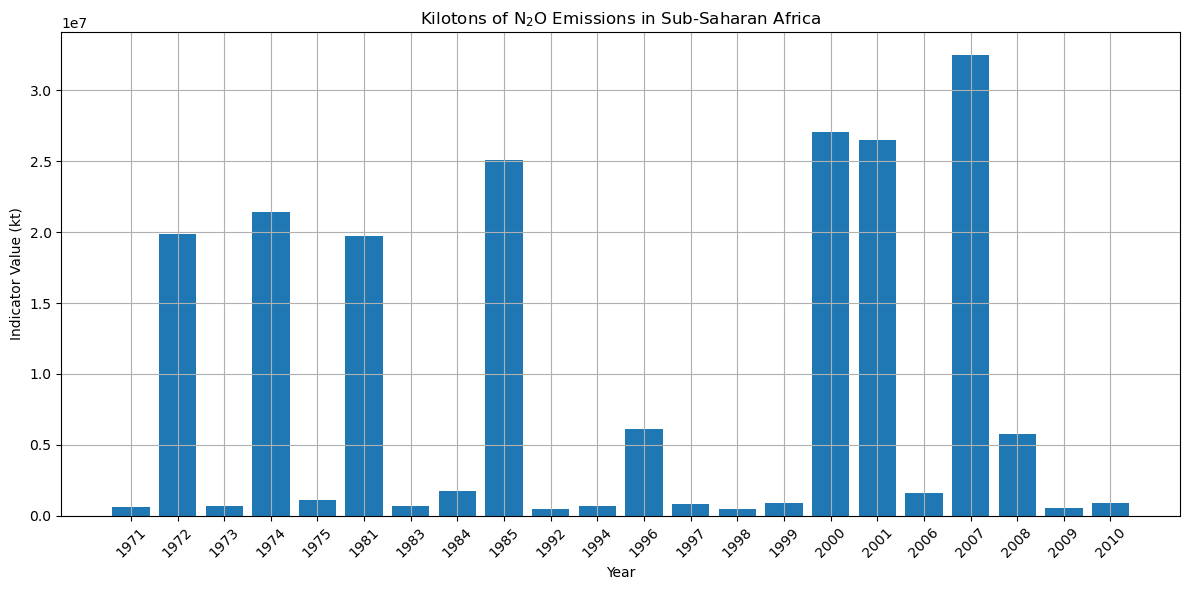

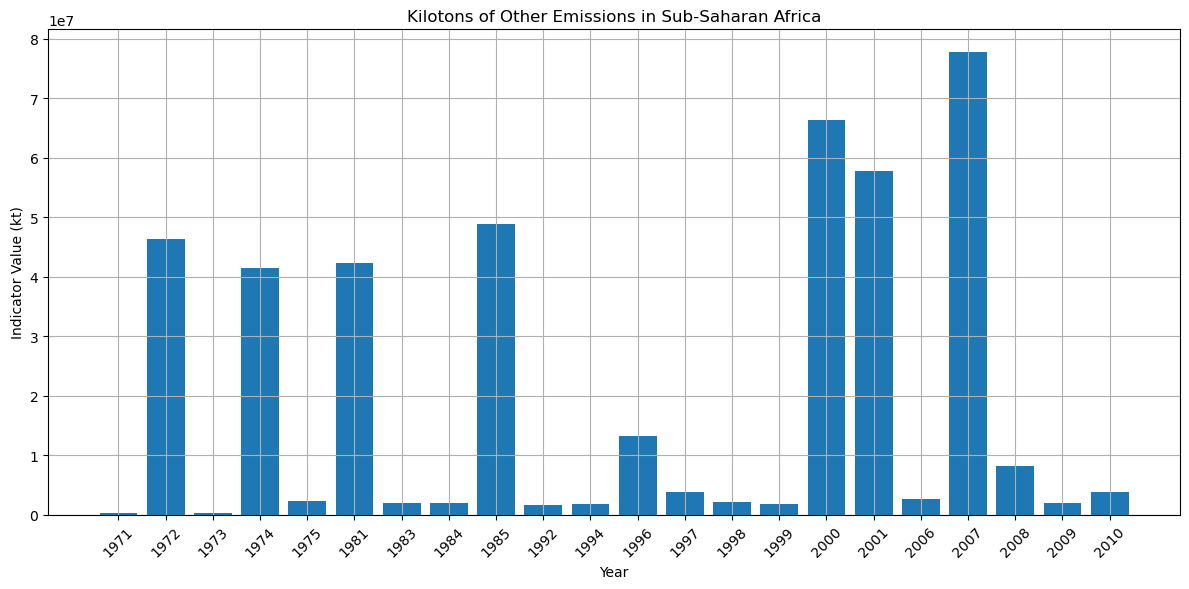

In [41]:
# SSA/CO2
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(SSA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CO2))]
# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CO$_2$ Emissions in Sub-Saharan Africa')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SSA/CH4
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(SSA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CH4))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CH$_4$ Emissions in Sub-Saharan Africa')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SSA/N2O
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(SSA)) & (Emissions_R_df['Indicator Code'].isin(indicator_N2O))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of N$_2$O Emissions in Sub-Saharan Africa')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SSA/Other
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(SSA)) & (Emissions_R_df['Indicator Code'].isin(indicator_Other))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of Other Emissions in Sub-Saharan Africa')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

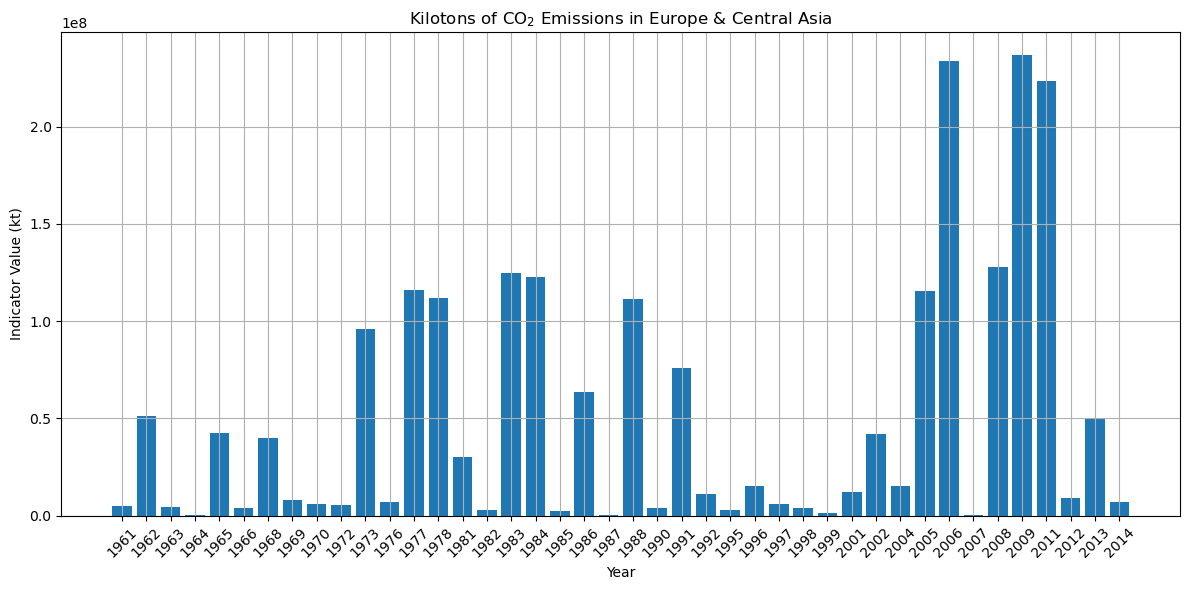

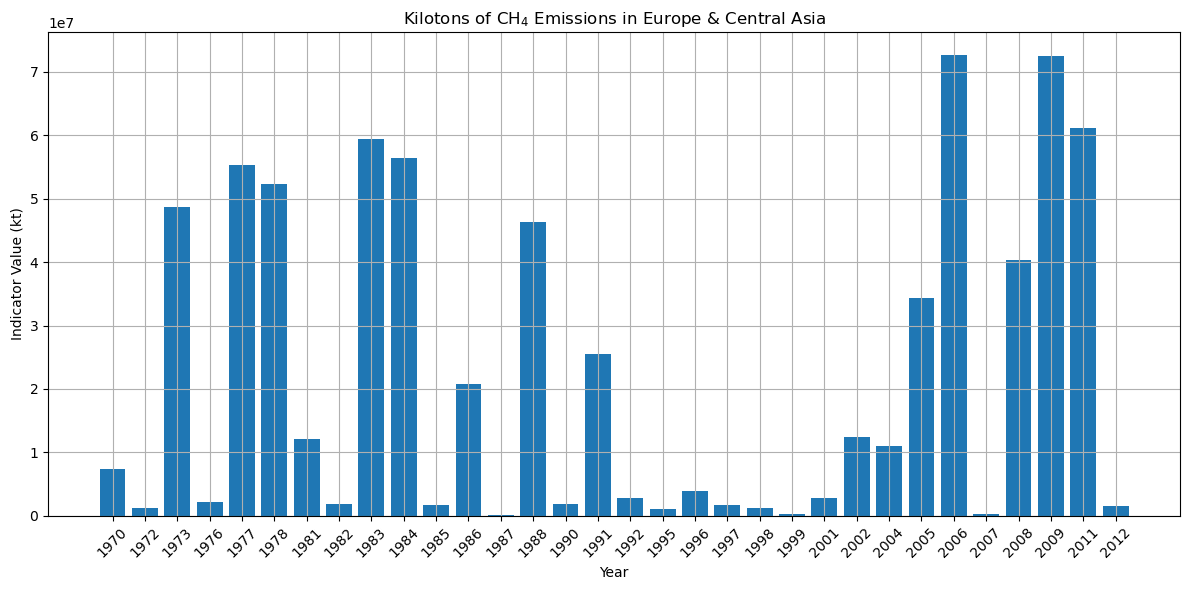

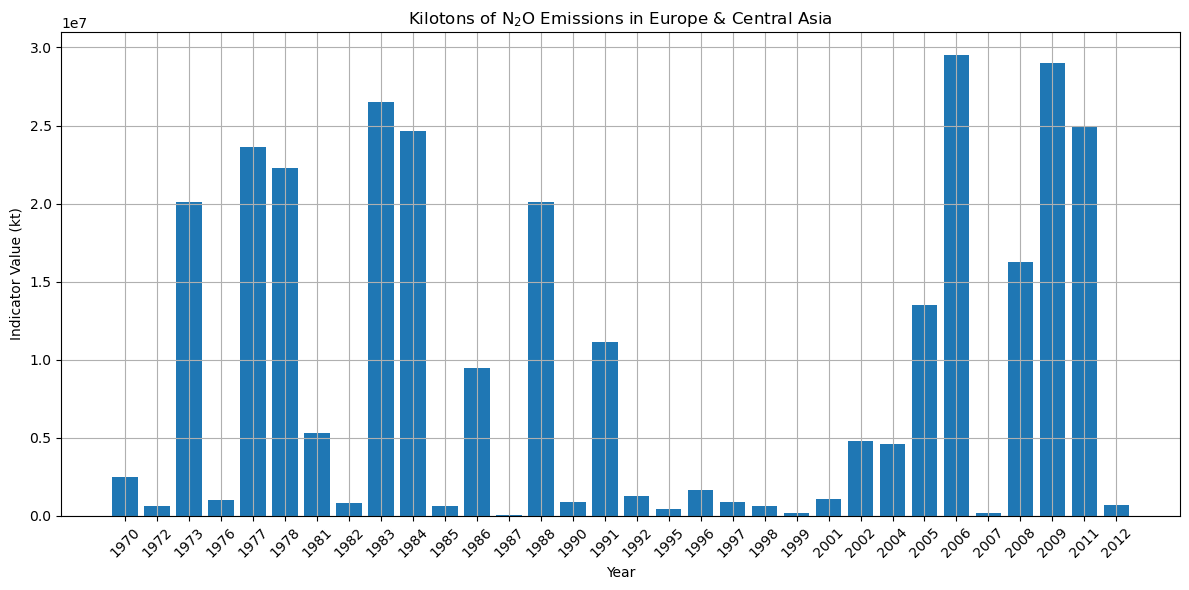

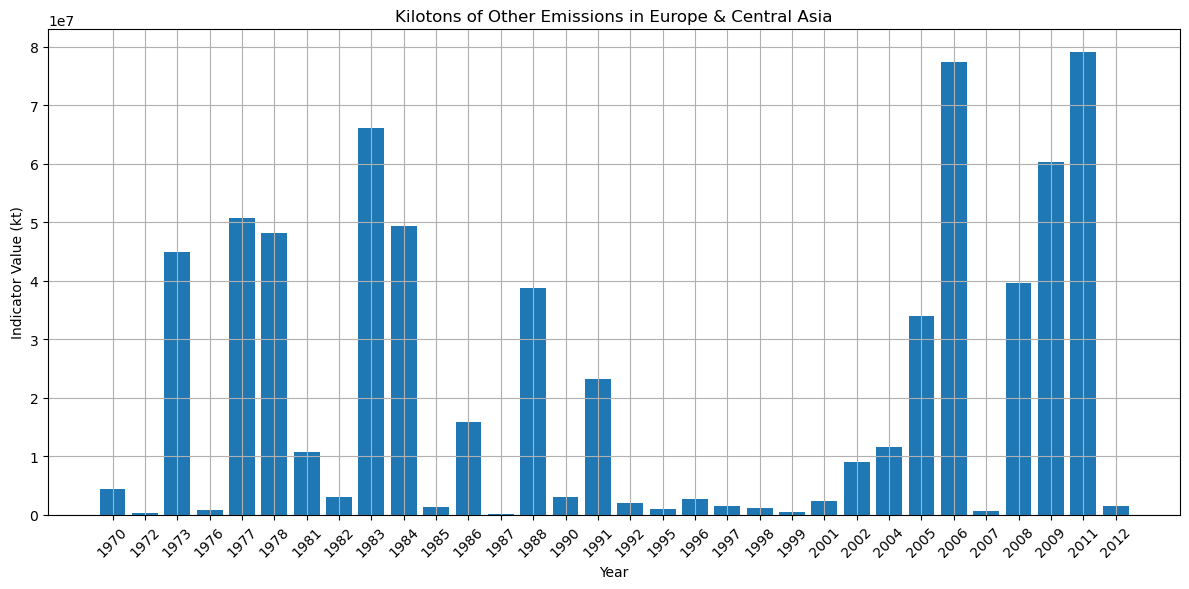

In [42]:
# ECA/CO2
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(ECA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CO2))]
# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CO$_2$ Emissions in Europe & Central Asia')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ECA/CH4
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(ECA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CH4))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CH$_4$ Emissions in Europe & Central Asia')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ECA/N2O
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(ECA)) & (Emissions_R_df['Indicator Code'].isin(indicator_N2O))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of N$_2$O Emissions in Europe & Central Asia')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ECA/Other
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(ECA)) & (Emissions_R_df['Indicator Code'].isin(indicator_Other))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of Other Emissions in Europe & Central Asia')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

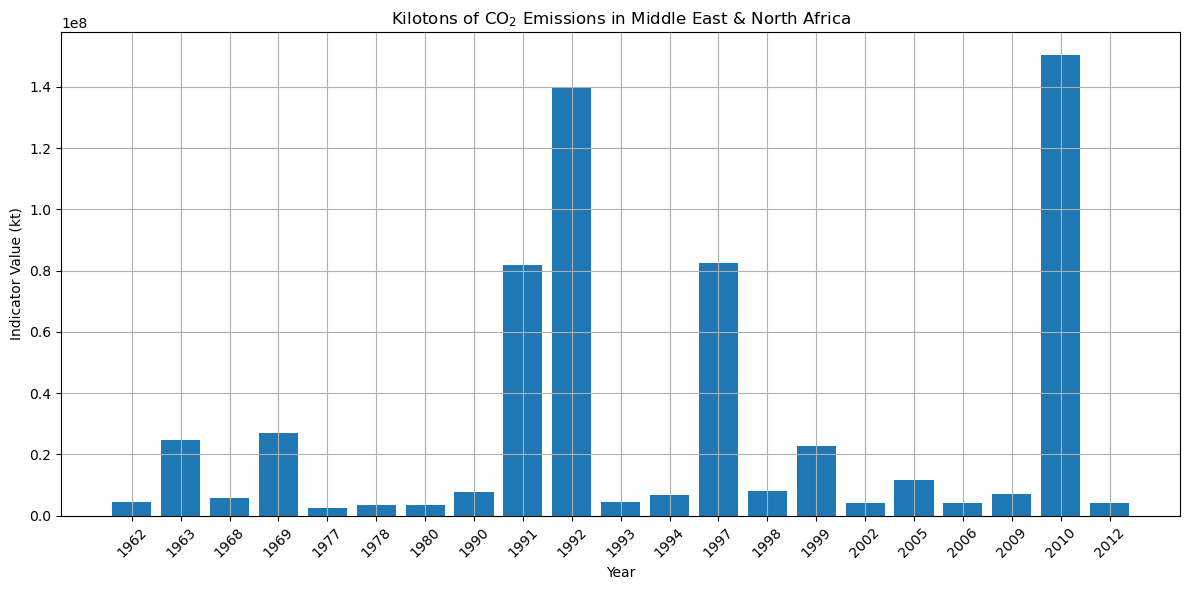

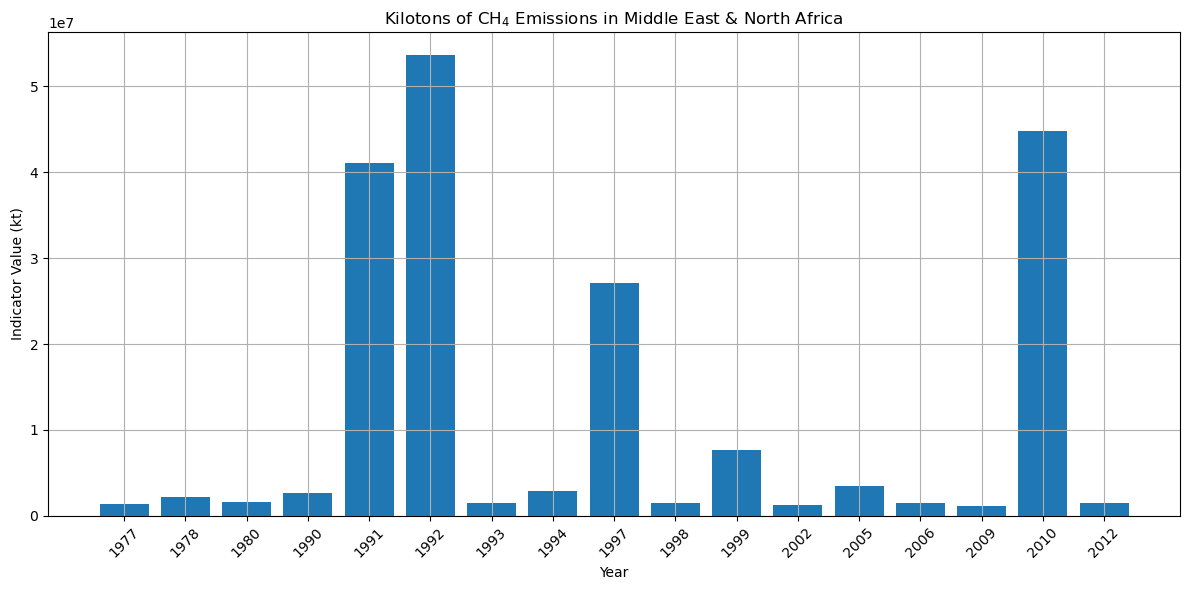

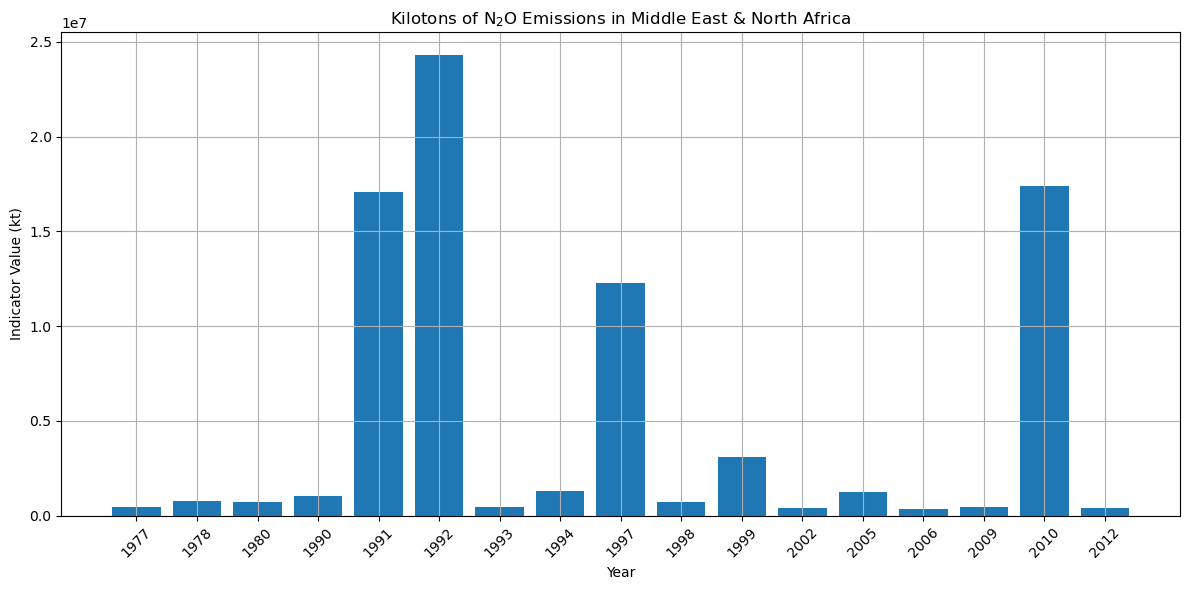

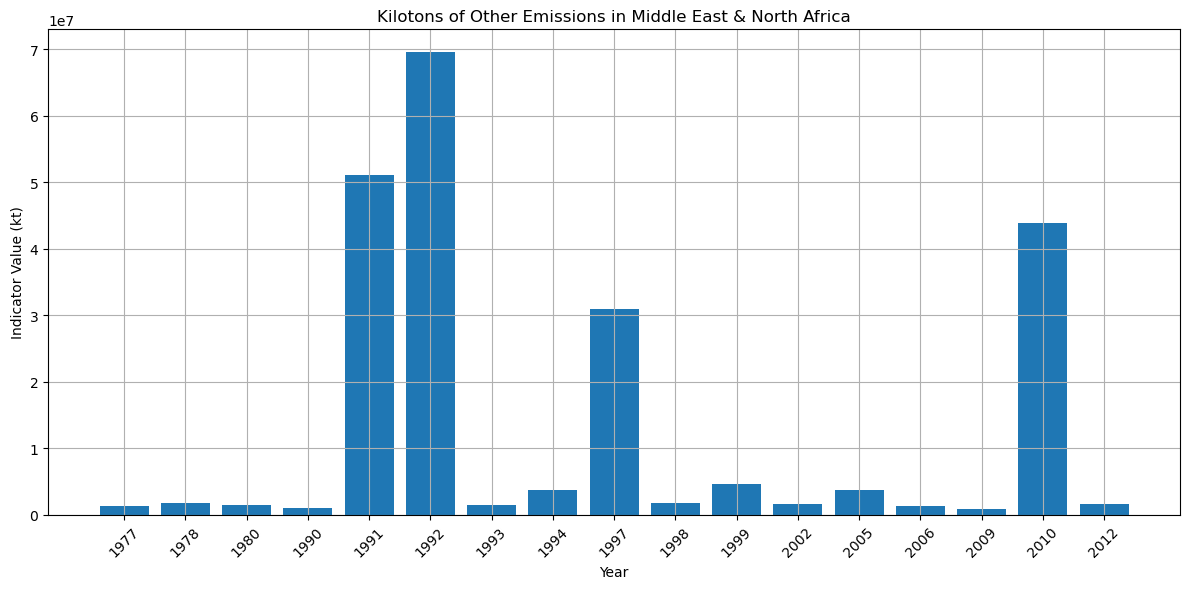

In [43]:
# MENA/CO2
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(MENA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CO2))]
# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CO$_2$ Emissions in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# MENA/CH4
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(MENA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CH4))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CH$_4$ Emissions in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# MENA/N2O
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(MENA)) & (Emissions_R_df['Indicator Code'].isin(indicator_N2O))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of N$_2$O Emissions in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# MENA/Other
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(MENA)) & (Emissions_R_df['Indicator Code'].isin(indicator_Other))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of Other Emissions in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

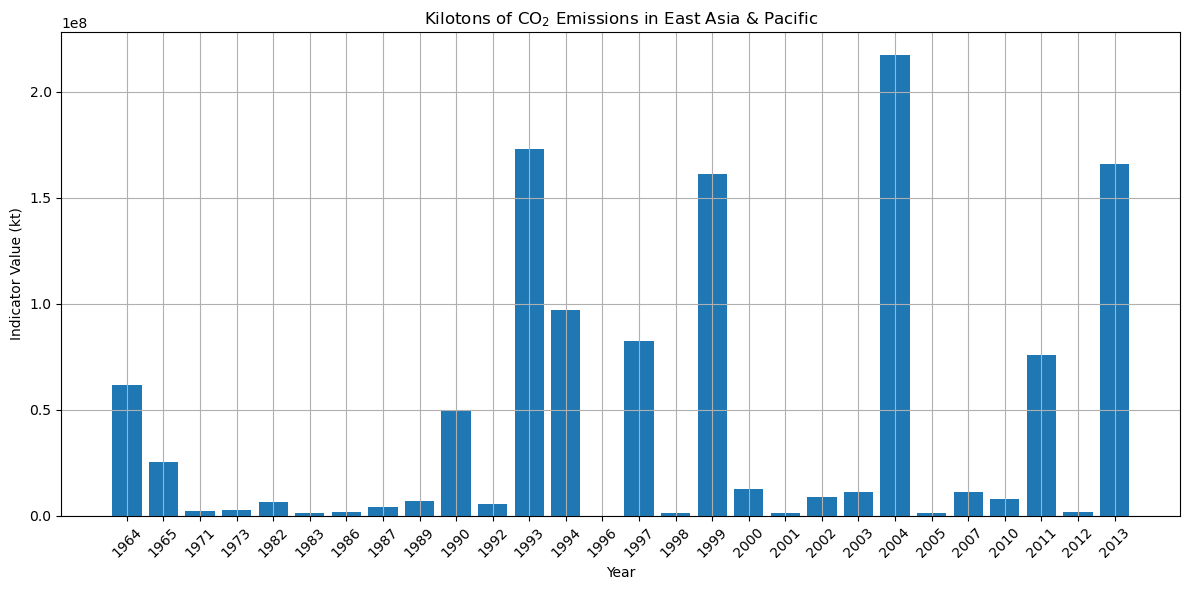

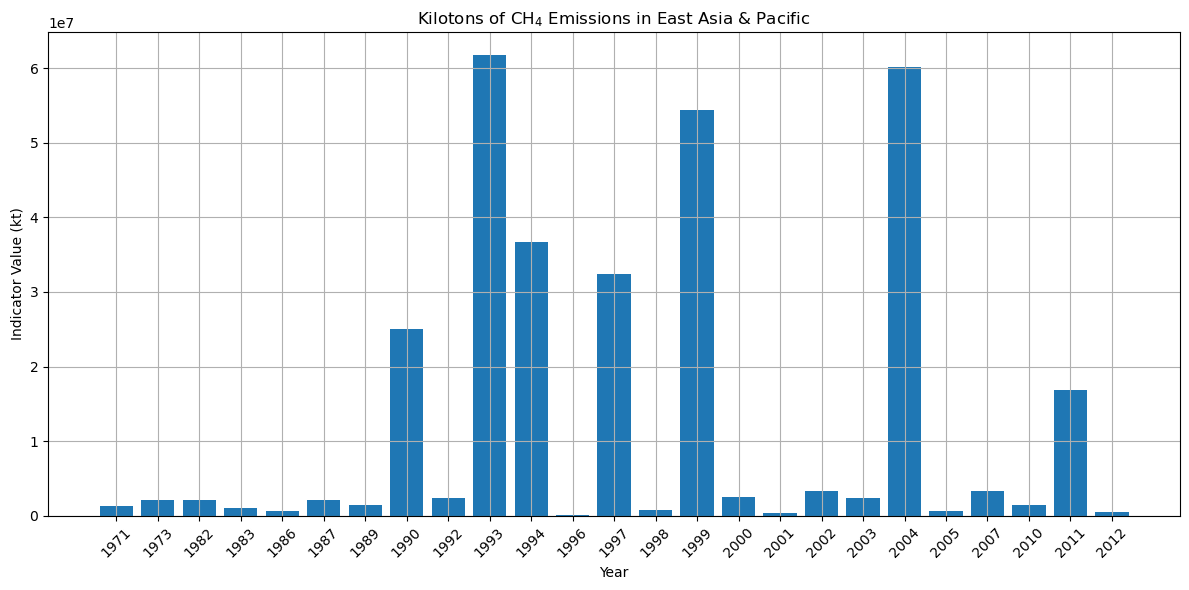

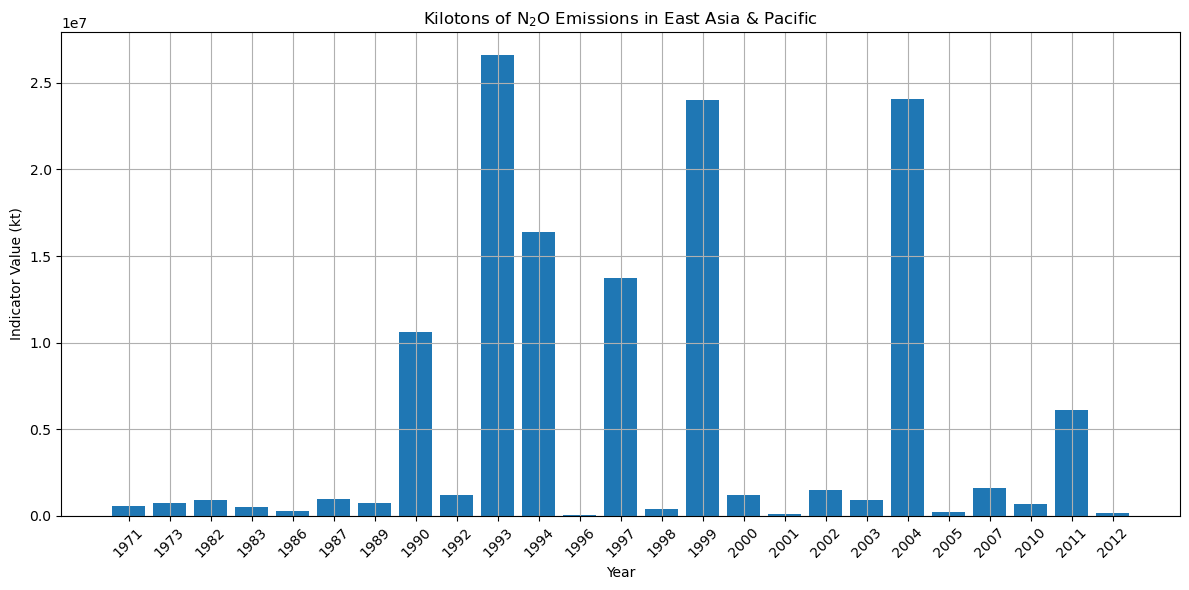

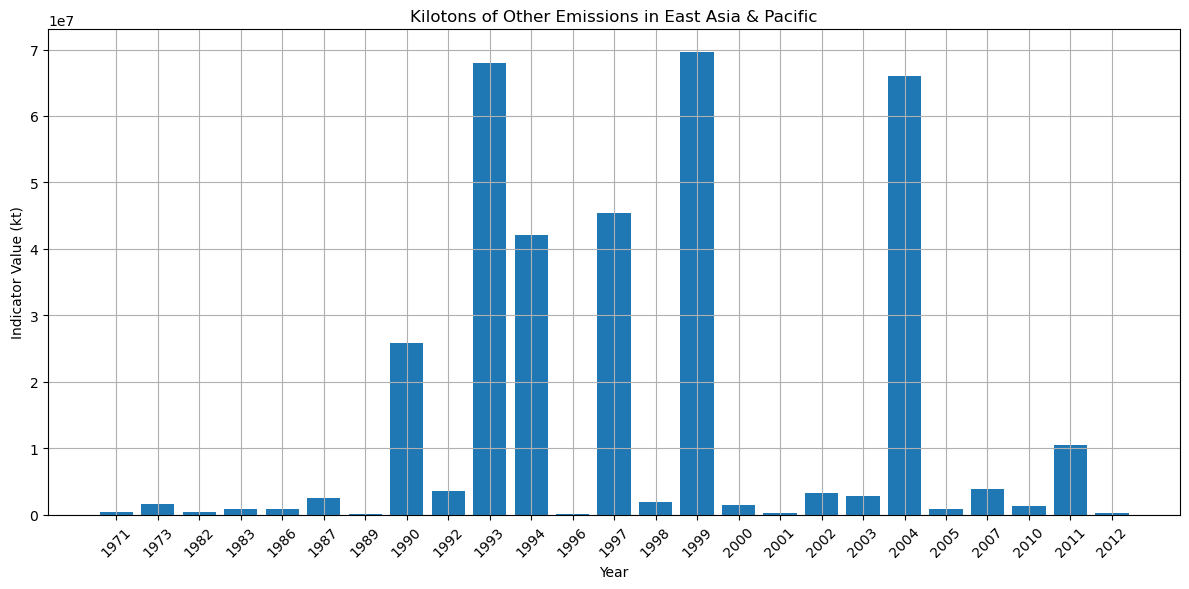

In [44]:
# EAP/CO2
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(EAP)) & (Emissions_R_df['Indicator Code'].isin(indicator_CO2))]
# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CO$_2$ Emissions in East Asia & Pacific')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# EAP/CH4
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(EAP)) & (Emissions_R_df['Indicator Code'].isin(indicator_CH4))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CH$_4$ Emissions in East Asia & Pacific')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# EAP/N2O
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(EAP)) & (Emissions_R_df['Indicator Code'].isin(indicator_N2O))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of N$_2$O Emissions in East Asia & Pacific')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# EAP/Other
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(EAP)) & (Emissions_R_df['Indicator Code'].isin(indicator_Other))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of Other Emissions in East Asia & Pacific')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

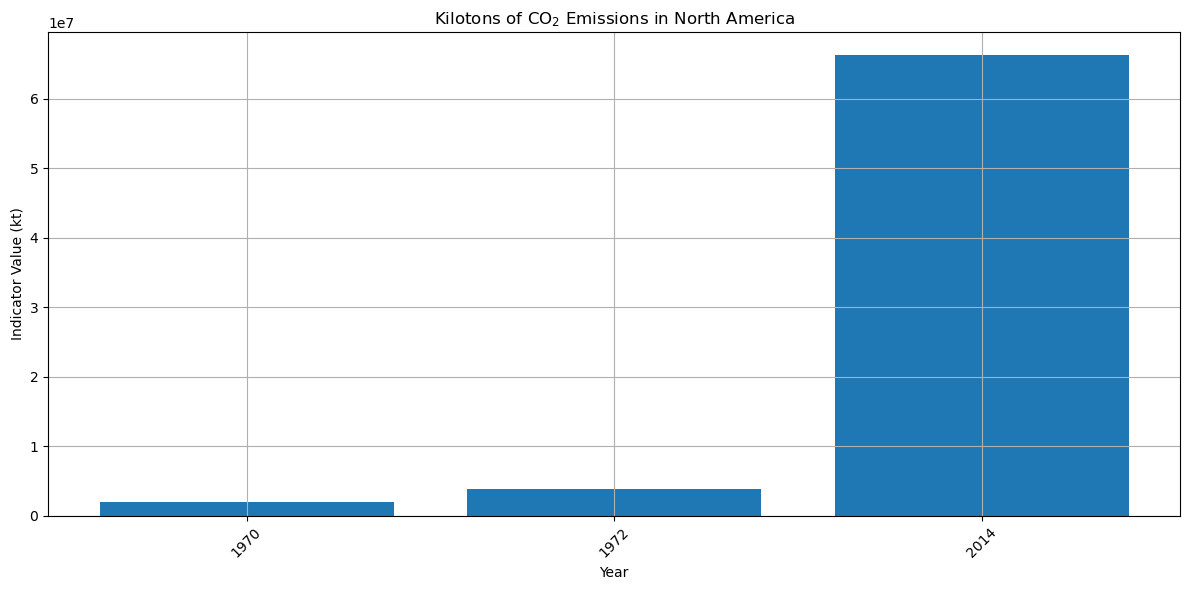

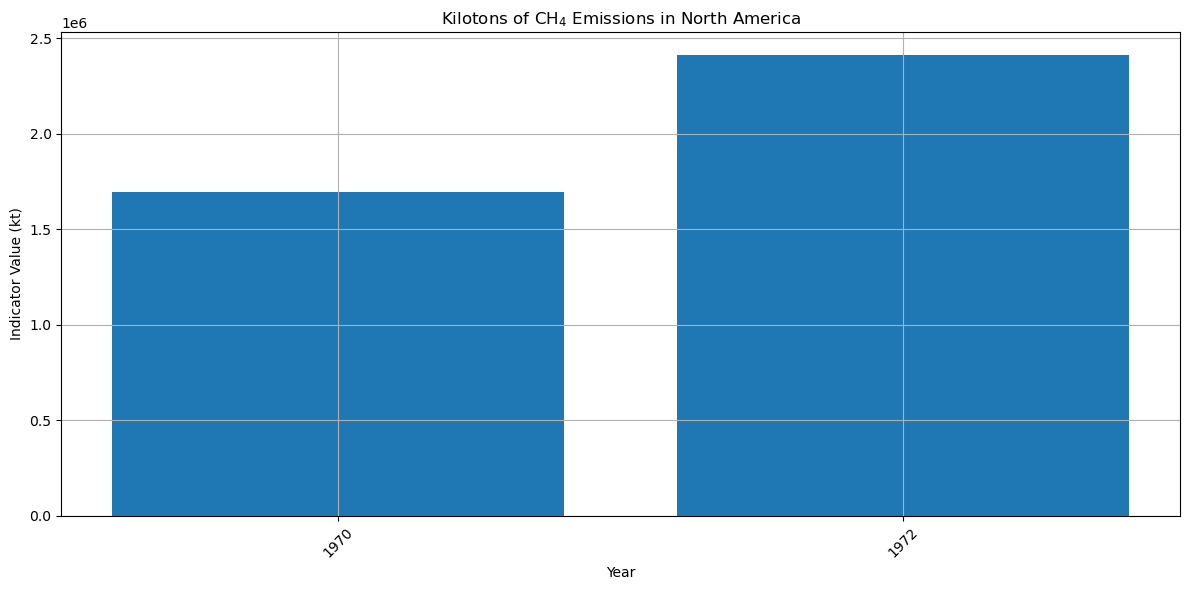

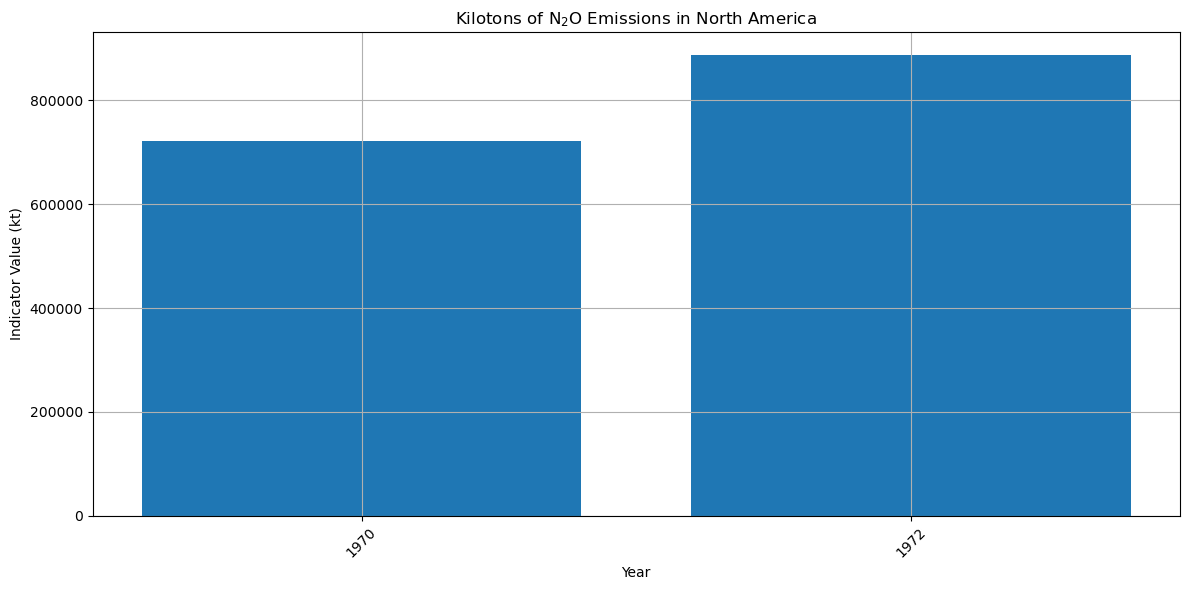

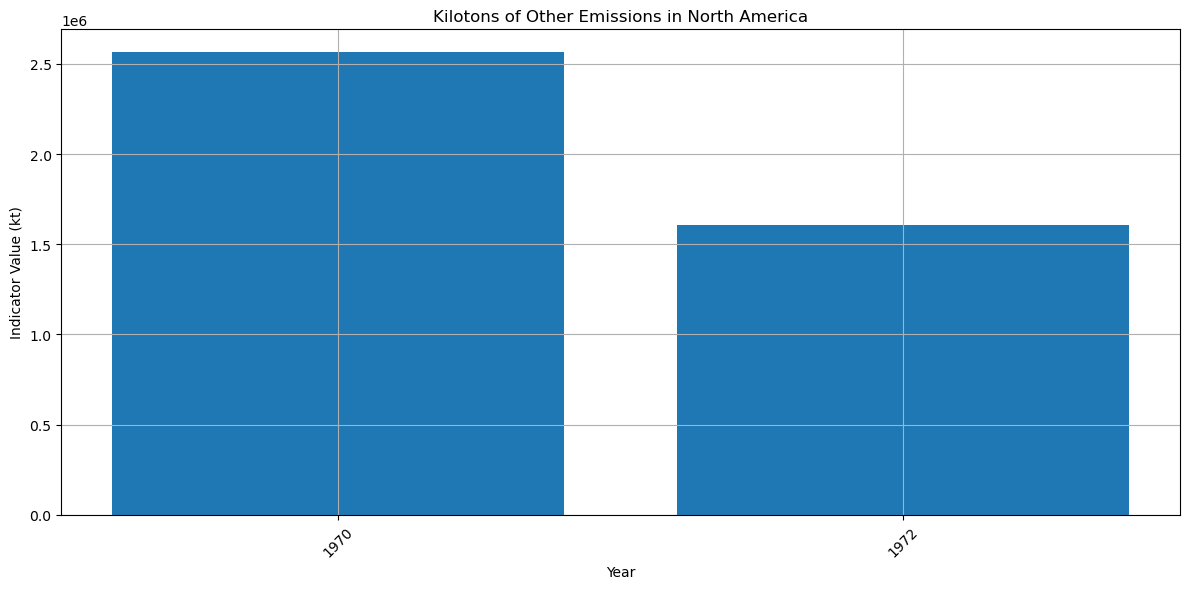

In [45]:
# NA/CO2
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(NA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CO2))]
# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CO$_2$ Emissions in North America')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# NA/CH4
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(NA)) & (Emissions_R_df['Indicator Code'].isin(indicator_CH4))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of CH$_4$ Emissions in North America')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# NA/N2O
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(NA)) & (Emissions_R_df['Indicator Code'].isin(indicator_N2O))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of N$_2$O Emissions in North America')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# NA/Other
filtered_df = Emissions_R_df[(Emissions_R_df['Region'].isin(NA)) & (Emissions_R_df['Indicator Code'].isin(indicator_Other))]

# Group by 'Year' and sum the 'Indicator Value' for each year
result = filtered_df.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('Kilotons of Other Emissions in North America')
plt.xlabel('Year')
plt.ylabel('Indicator Value (kt)')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p>It seems that countries in East Asia and the Pacific are the worst dealing with pollutant emissions. We also see that Europe and Central Asia have been making some efforts to reduce their emissions. Surprisingly this is not the case with North America and Sub-Saharan Africa, which levels have been increasing over the years as well. </p>

<h3>Exercise 8:</h3>
<p>In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features in more detail. </p>

<h4>8.1</h4>
<p>Which are the top five countries that have been in the top 10 of <code>CO2</code> emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?</p>

**Answer.**

In [46]:
print(Emissions_C_df.columns)

Index(['Indicator Name', 'Country Name', 'Country Code', 'Indicator Code',
       'Year', 'Indicator Value'],
      dtype='object')


In [51]:
print(Emissions_C_df['Country Name'].unique())

['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)' 'Middle income'
 'North America' 'OECD members' 'Other small states'
 'Pacific island small states' 'Post-demographic dividend'
 'Pre-demographic dividend' 'Small states' 'South Asia'
 'South

In [71]:
# Filter the DataFrame to include only CO2 emissions
co2_emissions_df = Emissions_C_df[Emissions_C_df['Indicator Code'] == 'CO2']

# Group by 'Country Name' and 'Year' to calculate total CO2 emissions
co2_emissions_grouped = co2_emissions_df.groupby(['Country Name', 'Year'])['Indicator Value'].sum().reset_index()

# Create an empty dictionary to store the top 10 CO2 emitters for each year
top_emitters_by_year = {}

# Identify the top 10 CO2 emitters for each year
years = co2_emissions_grouped['Year'].unique()
for year in years:
    year_data = co2_emissions_grouped[co2_emissions_grouped['Year'] == year]
    year_data = year_data.sort_values(by='Indicator Value', ascending=False)
    top_emitters_by_year[year] = year_data['Country Name'].head(10).tolist()

# Find the countries that have been consistently in the top 10 over the years
consistent_top_emitters = set(top_emitters_by_year[years[0]])
for year in years[1:]:
    consistent_top_emitters &= set(top_emitters_by_year[year])

# Exclude 'World', 'High income', and 'Low & Middle Income' from the analysis
countries_to_exclude = {'World', 'High income', 'Low & middle income'}

# Replace excluded countries with the next most consistent countries in the top 10
for country in countries_to_exclude:
    consistent_top_emitters.remove(country)

# Ensure you have at least 5 countries to analyze
while len(consistent_top_emitters) < 5:
    for year in years:
        additional_countries = set(top_emitters_by_year[year]) - consistent_top_emitters - countries_to_exclude
        if len(additional_countries) > 0:
            consistent_top_emitters.add(additional_countries.pop())
            if len(consistent_top_emitters) >= 5:
                break

# Now, you have the top 5 countries for analysis
# Next, analyze the CO2 emissions for these countries over the last 10 years
last_10_years = years[-10:]
reduction_efforts = {}

for country in consistent_top_emitters:
    country_data = co2_emissions_grouped[co2_emissions_grouped['Country Name'] == country]
    last_10_years_data = country_data[country_data['Year'].isin(last_10_years)]
    initial_emission = last_10_years_data.iloc[0]['Indicator Value']
    final_emission = last_10_years_data.iloc[-1]['Indicator Value']
    reduction = initial_emission - final_emission
    reduction_efforts[country] = reduction

# Sort the countries by the amount of reduction
sorted_reductions = sorted(reduction_efforts.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 countries that have made efforts to reduce CO2 emissions over the last 10 years
print("Top 5 Countries Consistently in top 10 CO2 Emissions, and their Reduction in CO2 Emissions:")
for country, reduction in sorted_reductions[:5]:
    print(f"{country}: {reduction} kt reduction")


Top 5 Countries Consistently in top 10 CO2 Emissions, and their Reduction in CO2 Emissions:
Post-demographic dividend: 1242713.2970000003 kt reduction
OECD members: 1053631.7760000005 kt reduction
North America: 555678.8449999997 kt reduction
IBRD only: -6718440.585451201 kt reduction
IDA & IBRD total: -6876846.827591401 kt reduction


The reduction has been calculated by subtracting the final emissions from the initial emissions, if the reductions are negative it means that those countries have not put in any efforts in reducing their CO$_2$ emissions, and their emissions have increased over the last $10$ years. From the results we can see that **''IBRD Only', and 'IDA & IBRD total'** countries have not reduced their emissions over the last $10$ years.

<h4>8.2</h4>
<p>Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?</p>

**Answer.**

To answer the first part of this question, I will find the top 5 countries with the most CO$_2$ emissions over the last 10 years, and if the countries in this list match the countries in the list above, then we know that these countries are the ones contributing the most towards global emissions.

In [110]:
# Filter the DataFrame to include only CO2 emissions
co2_emissions_df = Emissions_C_df[Emissions_C_df['Indicator Code'] == 'CO2']

# Exclude 'World', 'High income', and 'Low & middle income' countries
excluded_countries = {'World', 'High income', 'Low & middle income', 'Upper middle income', 'Middle income'}
co2_emissions_df = co2_emissions_df[~co2_emissions_df['Country Name'].isin(excluded_countries)]

# Group by 'Country Name' and 'Year' to calculate total CO2 emissions
co2_emissions_grouped = co2_emissions_df.groupby(['Country Name', 'Year'])['Indicator Value'].sum().reset_index()

# Next, analyze the CO2 emissions for the 'World' over the last 10 years
last_10_years = sorted(co2_emissions_grouped['Year'].unique())[-10:]

co2_emissions_df_last_10_years = co2_emissions_grouped[co2_emissions_grouped['Year'].isin(last_10_years)]

# Find the five countries with the highest CO2 emissions over the last 10 years
top_emitters = co2_emissions_grouped.groupby('Country Name')['Indicator Value'].sum().nlargest(5)

# Print the five countries with the highest CO2 emissions
print("The five countries with the highest CO2 emissions over the last 10 years are:")
print(top_emitters.round().astype(int))

# Next, analyze the CO2 emissions for these countries over the last 10 years
last_10_years = sorted(co2_emissions_grouped['Year'].unique())[-10:]
reduction_efforts = {}

for country in top_emitters.index:
    country_data = co2_emissions_grouped[co2_emissions_grouped['Country Name'] == country]
    last_10_years_data = country_data[country_data['Year'].isin(last_10_years)]
    
    # Check if there is data for the country over the last 10 years
    if not last_10_years_data.empty:
        initial_emission = last_10_years_data.iloc[0]['Indicator Value']
        final_emission = last_10_years_data.iloc[-1]['Indicator Value']
        reduction = initial_emission - final_emission
        reduction_efforts[country] = round(reduction)

# Sort the countries by the amount of reduction
sorted_reductions = sorted(reduction_efforts.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 countries that have made efforts to reduce CO2 emissions over the last 10 years
print("\nEmission reduction efforts of top 5 emitters over the last 10 years:")
for country, reduction in sorted_reductions:
    print(f"{country}: {round(reduction)} kt reduction")


The five countries with the highest CO2 emissions over the last 10 years are:
Country Name
OECD members                 590674081
Post-demographic dividend    577849050
IDA & IBRD total             507831017
IBRD only                    485461136
Late-demographic dividend    339618582
Name: Indicator Value, dtype: int32

Emission reduction efforts of top 5 emitters over the last 10 years:
Post-demographic dividend: 1242713 kt reduction
OECD members: 1053632 kt reduction
Late-demographic dividend: -5185999 kt reduction
IBRD only: -6718441 kt reduction
IDA & IBRD total: -6876847 kt reduction


To answer the second part of the question, I will calculate the total CO$_2$ emission over the last 10 years of the 'World', subtract that value with the sum of the total CO$_2$ emissions of the top 5 emitters, that will be the total emission of the rest of the world. To find the initial emissions of the rest of the world, I will do the exact same thing, just won't sum up over the 10 years. 

In [116]:
# Filter the DataFrame to include only CO2 emissions
co2_emissions_df = Emissions_C_df[Emissions_C_df['Indicator Code'] == 'CO2']

# Exclude 'World', 'High income', and 'Low & middle income' countries
excluded_countries = set(Emissions_C_df['Country Name'].unique()) - {'World'}
co2_emissions_df = co2_emissions_df[~co2_emissions_df['Country Name'].isin(excluded_countries)]

# Next, analyze the CO2 emissions for the 'World' over the last 10 years
last_10_years = sorted(co2_emissions_grouped['Year'].unique())[-10:]

co2_emissions_df_last_10_years = co2_emissions_df[co2_emissions_df['Year'].isin(last_10_years)]

world_total = co2_emissions_df_last_10_years.groupby('Country Name')['Indicator Value'].sum()
top5_total = sum(top_emitters)

world_total = world_total[0] - top5_total

print('The Difference in Emissions between the Rest of the World and the Top 5 Emitters over the Last 10 Years is:')
print(world_total,'Kt')

The Difference in Emissions between the Rest of the World and the Top 5 Emitters over the Last 10 Years is:
-2170355102.857661 Kt


Essentially, the total CO$_2$ emissions by the rest of the world is much less than the total emissions by the top 5 countries, therefore, we can see that the rest of the world is doing a good job at managing their emissions, but the top 5 countries are responsible for most the world's CO$_2$ emissions.

<h3>Exercise 9:</h3>
<p>One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The <code>PM2.5</code> indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The <code>PM2.5_WHO</code> measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher <code>PM2.5_WHO</code> indicator are more likely to suffer from bad health conditions. </p>
<h4>9.1</h4>
<p>The client would like to know if there is any relationship between the <code>PM2.5_WHO</code> indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?</p>
<p><strong>Hint:</strong> The DataFrame <code>WDI_countries</code> contains a column named <code>Income Group</code>. </p>

**Answer.**

In [119]:
WDI_countries = pd.read_csv("./files/WDI_csv/WDICountry.csv")

In [120]:
WDI_countries.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2010,NaN,NaN,Yes,NaN,NaN,2016.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,NaN,NaN


In [126]:
print(WDI_countries['Income Group'].unique())

['High income' 'Low income' 'Lower middle income' 'Upper middle income'
 nan]


In [149]:
Emissions_highincome_filter = Emissions_C_df[Emissions_C_df['Country Name'].isin(['High income']) & Emissions_C_df['Indicator Code'].isin(['PM2.5_WHO'])]
Emissions_lowincome_filter = Emissions_C_df[Emissions_C_df['Country Name'].isin(['Low income']) & Emissions_C_df['Indicator Code'].isin(['PM2.5_WHO'])]
Emissions_uppermiddleincome_filter = Emissions_C_df[Emissions_C_df['Country Name'].isin(['Upper middle income']) & Emissions_C_df['Indicator Code'].isin(['PM2.5_WHO'])]
Emissions_lowermiddleincome_filter = Emissions_C_df[Emissions_C_df['Country Name'].isin(['Lower middle income']) & Emissions_C_df['Indicator Code'].isin(['PM2.5_WHO'])]


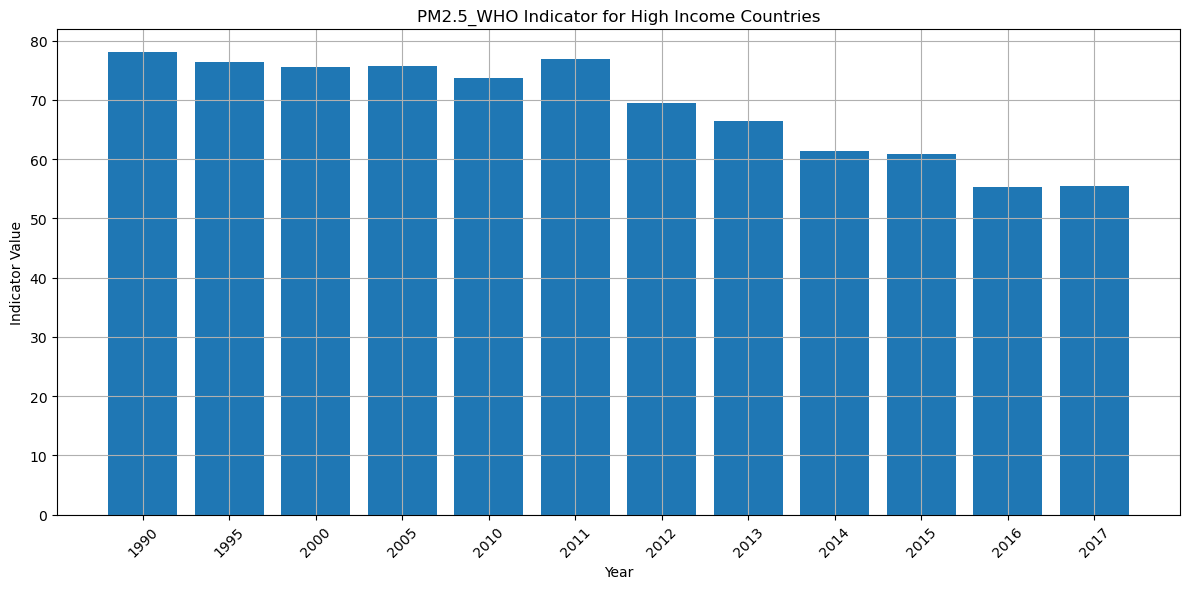

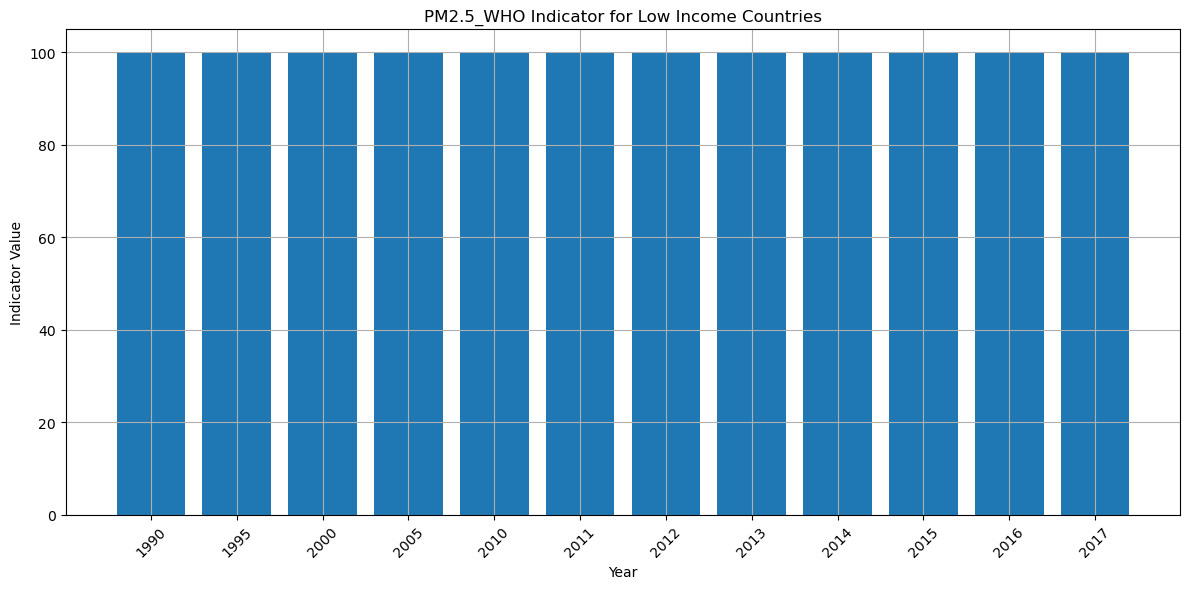

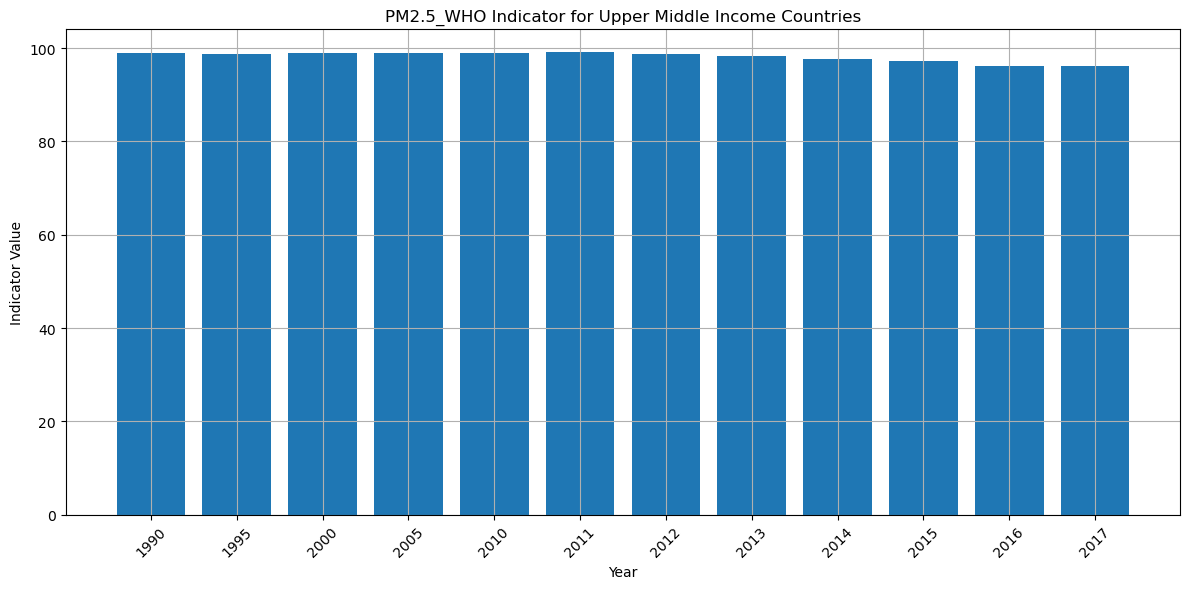

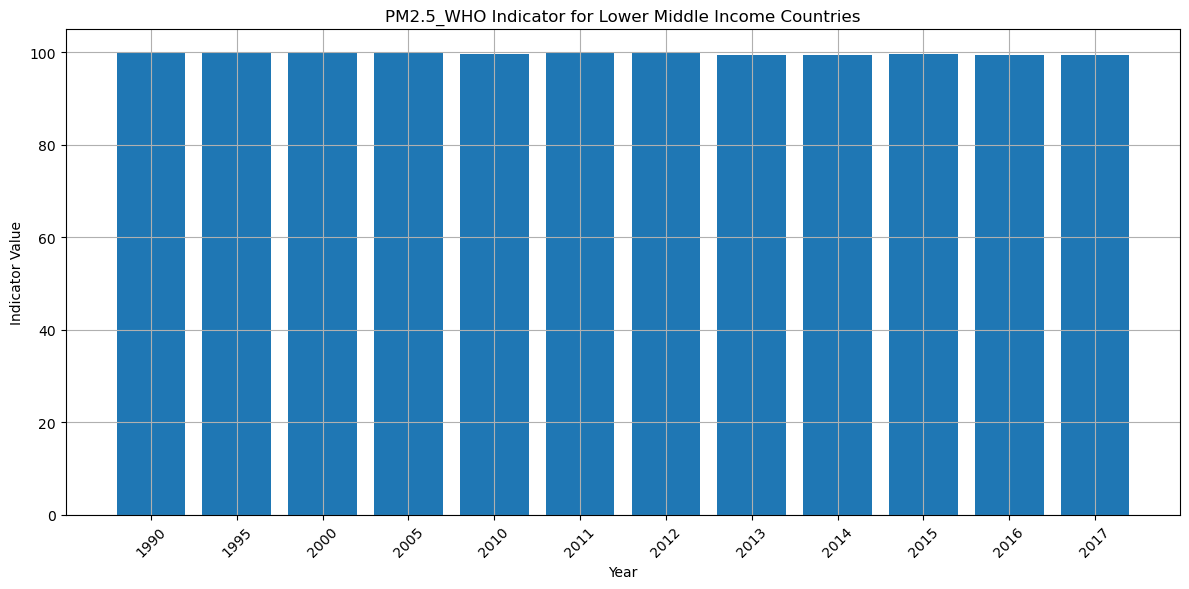

In [150]:
# Group by 'Year' and sum the 'Indicator Value' for each year
result = Emissions_highincome_filter.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('PM2.5_WHO Indicator for High Income Countries')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by 'Year' and sum the 'Indicator Value' for each year
result = Emissions_lowincome_filter.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('PM2.5_WHO Indicator for Low Income Countries')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by 'Year' and sum the 'Indicator Value' for each year
result = Emissions_uppermiddleincome_filter.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('PM2.5_WHO Indicator for Upper Middle Income Countries')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Group by 'Year' and sum the 'Indicator Value' for each year
result = Emissions_lowermiddleincome_filter.groupby('Year')['Indicator Value'].sum().reset_index()
year = np.array(result['Year'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(year, indicator_value)

# Set the title and labels for the x and y axes
plt.title('PM2.5_WHO Indicator for Lower Middle Income Countries')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.grid('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>9.2</h4>
<p>What do you think are the causes behind the results in Exercise 9.1?</p>

**Answer.**

Higher income countries just have more money to take care of their health. They most likely live in first world countries, have good healthcare systems, less pollution, things like that.

<h3>Exercise 10:</h3>
<p>Finally, our client is interested in investigating the impacts and relationships between <strong>high levels of exposure to particle matter</strong> and <strong>the health of the population</strong>. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the <code>WDIdata.csv</code> file and work with that. </p>

<h4>10.1</h4>
<p>Which indicators present in the file  <code>WDISeries.csv</code> file might be useful to solve the client's question? Explain.</p>
<p><strong>Note:</strong> Naming one or two indicators is more than enough for this question. </p>

**Answer.**

Indicator Code: **EN.ATM.PM25.MC.T1.ZS** - Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) Interim Target 1 (IT-1) is defined as the portion of a country’s population living in places where mean annual concentrations of PM2.5 are greater than 35 micrograms per cubic meter. The Air Quality Guideline (AQG) of 10 micrograms per cubic meter is recommended by the WHO as the lower end of the range of concentrations over which adverse health effects due to PM2.5 exposure have been observed.

<h4>10.2</h4>
<p>Use the indicators provided in Exercise 10.1 to give valuable information to the client. </p>

**Answer.**

In [153]:
print(WDI_data.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')


In [166]:
if 'EN.ATM.PM25.MC.T1.ZS' in Emissions_df['Indicator Code'].values:
    print("'EN.ATM.PM25.MC.T1.ZS' is present in the 'Indicator Code' column.")
else:
    print("'EN.ATM.PM25.MC.T1.ZS' is not present in the 'Indicator Code' column.")

'EN.ATM.PM25.MC.T1.ZS' is present in the 'Indicator Code' column.


In [208]:
Emissions_filter = Emissions_df[Emissions_df['Indicator Code'].isin(['EN.ATM.PM25.MC.T1.ZS'])]
Emissions_filter = Emissions_filter.reset_index(drop=True)


In [209]:
print(Emissions_filter['Country Name'].value_counts())
print(Emissions_filter['Country Name'].unique())

Afghanistan    12
Rwanda         12
Nepal          12
Netherlands    12
New Zealand    12
               ..
Ghana          12
Greece         12
Greenland      12
Grenada        12
Zimbabwe       12
Name: Country Name, Length: 194, dtype: int64
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' '

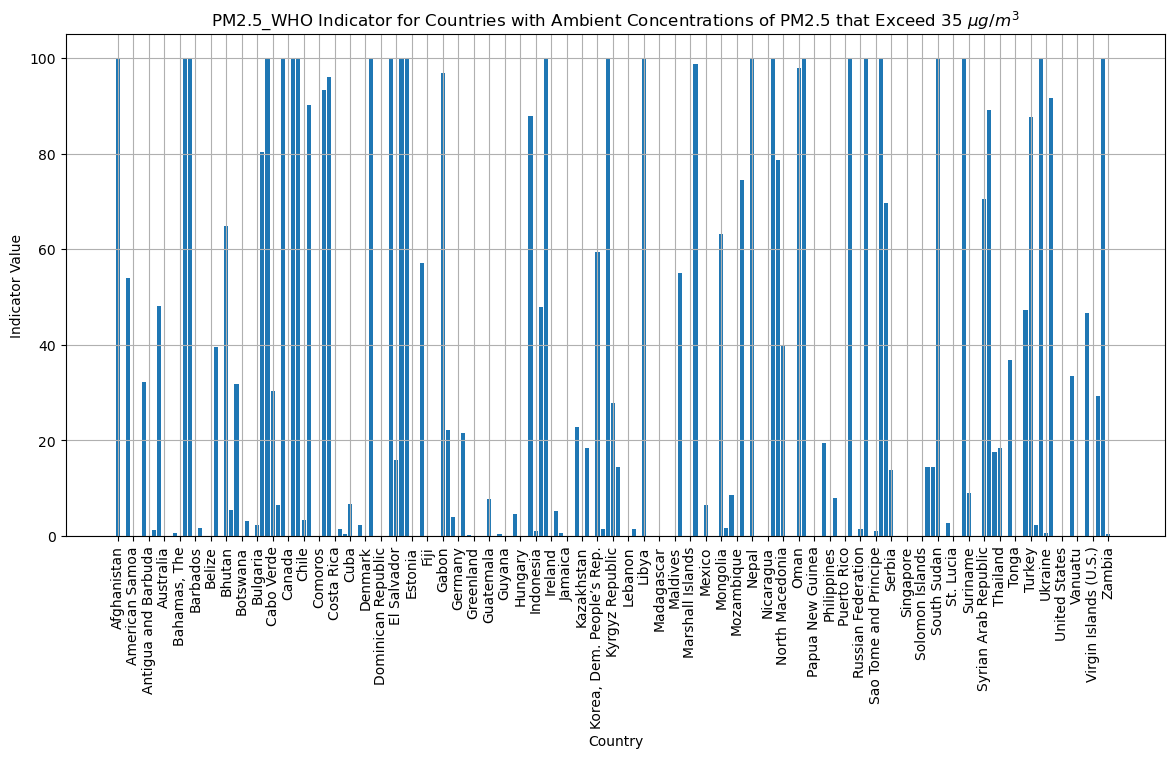

In [215]:
result = Emissions_filter.groupby('Country Name')['Indicator Value'].mean().reset_index()
countries = np.array(result['Country Name'])
indicator_value = np.array(result['Indicator Value'])
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(countries, indicator_value)

# Set the title and labels for the x and y axes
plt.title("PM2.5_WHO Indicator for Countries with Ambient Concentrations of PM2.5 that Exceed 35 $\\mu g/m^3$")
plt.xlabel('Country')
plt.ylabel('Indicator Value')
plt.grid('True')
plt.tight_layout()
plt.xticks(rotation=90)
# Reduce the number of ticks to display every 3rd country
n = 3  # Adjust as needed
country_ticks = countries[::n]
plt.xticks(range(len(countries))[::n], country_ticks)

plt.show()

<h4>10.3</h4>
<p>Extend the analysis above to find some countries of interest. These are defined as</p>
<ul>
<li>The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure</li>
<li>The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure</li>
</ul>

**Answer.**

In [220]:
if 'SH.STA.AIRP.P5' in WDI_data['Indicator Code'].values:
    print("'SH.STA.AIRP.P5' is present in the 'Indicator Code' column.")
else:
    print("'SH.STA.AIRP.P5' is not present in the 'Indicator Code' column.")


'SH.STA.AIRP.P5' is present in the 'Indicator Code' column.


This indicator is the mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population). I will define low pm2.5 exposure as under the average, and I will define high pm2.5 exposure as greater than or equal to the average.

<h4>10.4</h4>
<p>Finally, we want to look at the mortality data by income. We expect higher income countries to have lower pollution-related mortality. Find out if this assumption holds. Calculate summary statistics and histograms for each income category and note any trends.</p>

In [315]:
merge_df_income = WDICountry.merge(Emissions_C_df['Country Code'], on='Country Code')['Income Group']
Emissions_C_df['Income']=merge_df_income
WDI_ids = pd.read_csv("./files/WDI_csv/WDISeries.csv")
WDI_mortality_ids = WDI_ids[WDI_ids['Indicator Name'] == 'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)']
Mortality_df = WDI_data[WDI_data['Indicator Name'].isin(WDI_mortality_ids['Indicator Name'])]
Mortality_df = pd.melt(Mortality_df, id_vars=['Indicator Name','Country Name','Country Code','Indicator Code'], var_name='Year', value_name='Indicator Value')
Mortality_df = Mortality_df[Mortality_df['Year'] != 'Unnamed: 64']
Mortality_df = Mortality_df.dropna(subset=['Indicator Value'])
Mortality_df = Mortality_df.reset_index()
Mortality_df = Mortality_df.drop('index',axis=1)
merge_mortality_df_income = WDICountry.merge(Mortality_df['Country Code'], on='Country Code')['Income Group']
Mortality_df['Income']=merge_df_income
Mortality_df.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Indicator Value,Income
0,Mortality rate attributed to household and amb...,Arab World,ARB,SH.STA.AIRP.P5,2016,101.932592,High income
1,Mortality rate attributed to household and amb...,Caribbean small states,CSS,SH.STA.AIRP.P5,2016,42.299061,High income
2,Mortality rate attributed to household and amb...,Central Europe and the Baltics,CEB,SH.STA.AIRP.P5,2016,42.037222,High income
3,Mortality rate attributed to household and amb...,Early-demographic dividend,EAR,SH.STA.AIRP.P5,2016,142.558914,High income
4,Mortality rate attributed to household and amb...,East Asia & Pacific,EAS,SH.STA.AIRP.P5,2016,105.033765,High income


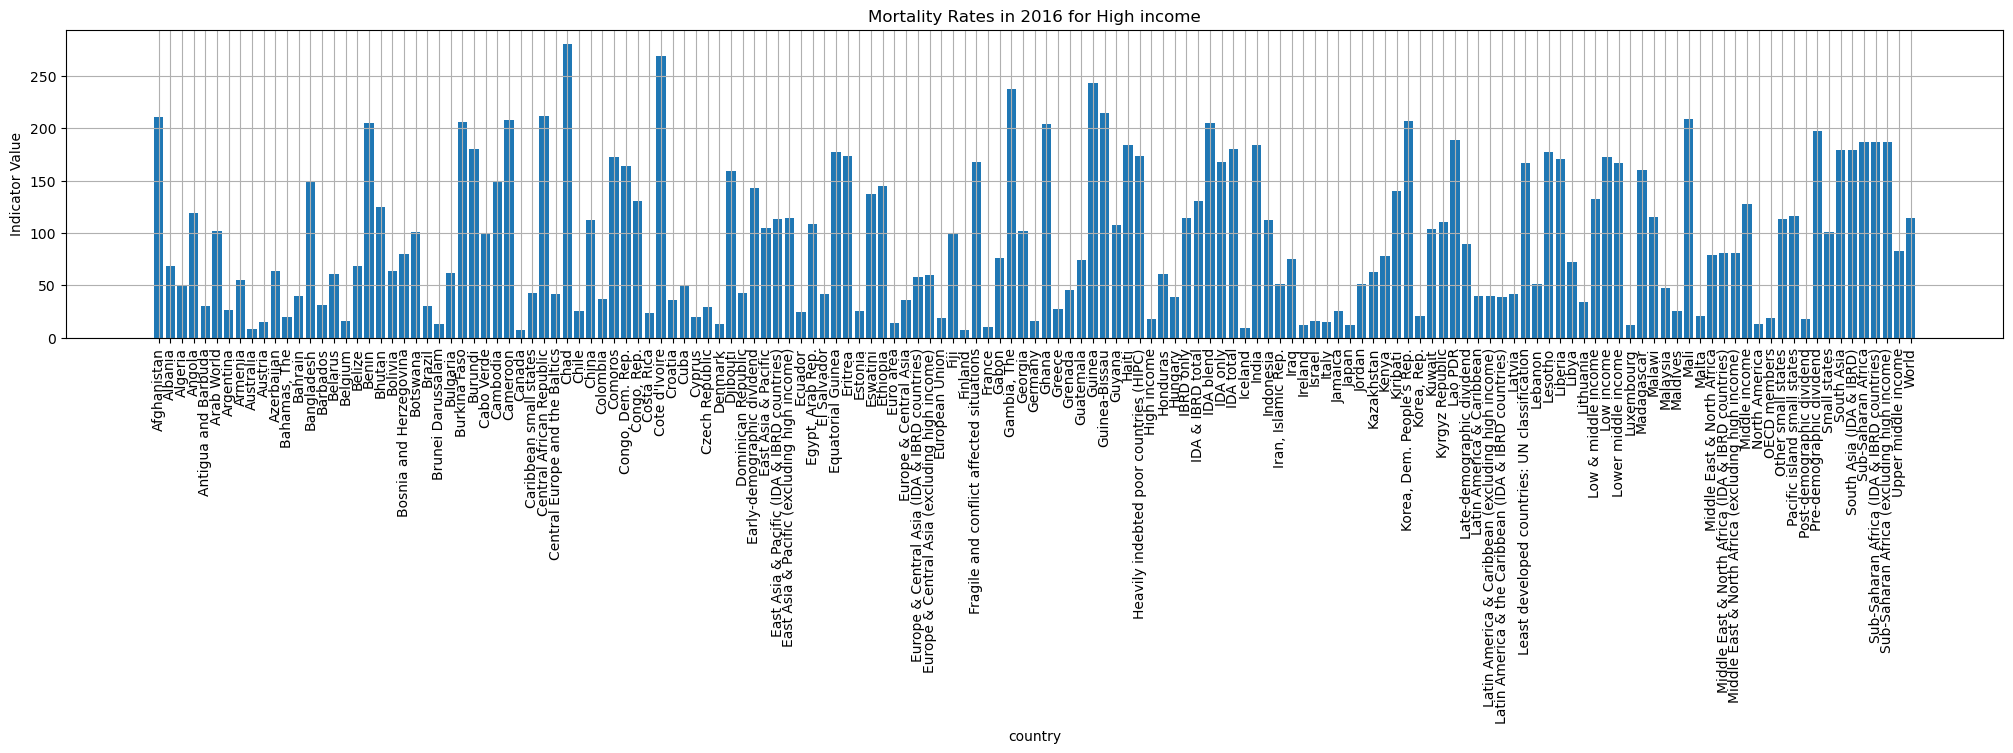

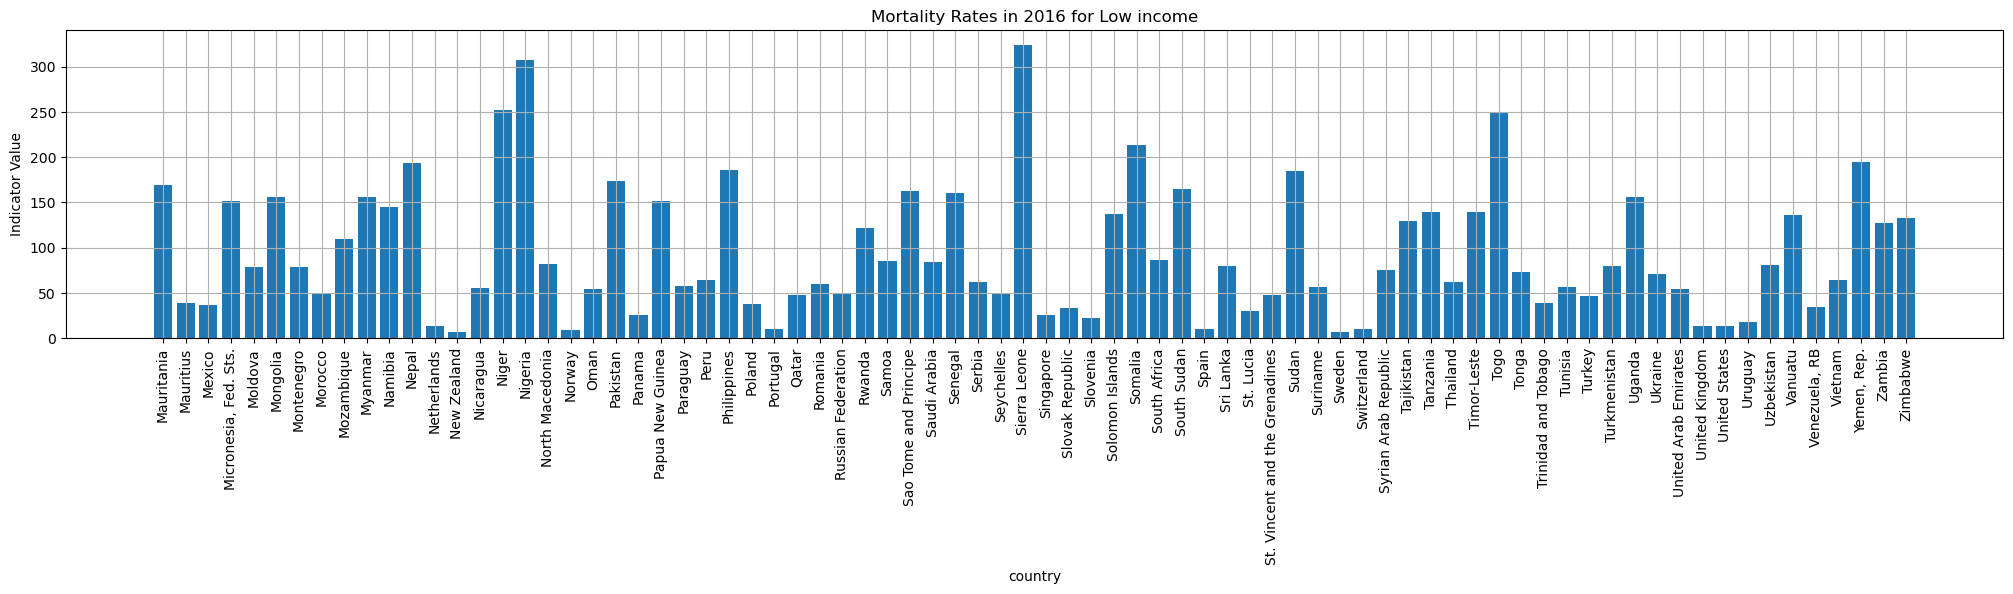

In [316]:
for a in Mortality_df.groupby('Year'):
    for i in Mortality_df.groupby('Income'):
        country = []
        indicator = []
        for j in i[1].groupby('Country Name'):
            country.append(j[0])
            indicator.append(j[1]['Indicator Value'].sum())
        plt.figure(figsize=(25,4))
        plt.xlabel('country')
        plt.ylabel('Indicator Value')
        plt.xticks(rotation=90)
        plt.title("Mortality Rates in {} for {}".format(a[0],i[0]))
        plt.grid(True)
        plt.bar(country,indicator)
        plt.show()

In [328]:
print("Average mortality rate for high income: {}".format(Mortality_df.groupby('Income')['Indicator Value'].mean()[0]))
print("Average mortality rate for low income: {}".format(Mortality_df.groupby('Income')['Indicator Value'].mean()[1]))
print("Number of countries considered high income: {}".format(Mortality_df.groupby('Income')['Indicator Value'].size()[0]))
print("Number of countries considered low income: {}".format(Mortality_df.groupby('Income')['Indicator Value'].size()[1]))

Average mortality rate for high income: 95.61411006611844
Average mortality rate for low income: 94.21538461538462
Number of countries considered high income: 151
Number of countries considered low income: 78


**Answer.**

From the plots, we see that clearly countries with lower incomese have higher mortality rates due to air pollution, although on average just looking at the number, we see that countries with higher income have a higher mortality rate, but this is only due to the size of the datasets.

<h4>10.5</h4>
<p>At the start, we asked some questions. Based on your analysis, provide a short answer to each of these:</p>
<ol>
<li>Are we making any progress in reducing the amount of emitted pollutants across the globe?</li>
<li>Which are the critical regions where we should start environmental campaigns?</li>
<li>Are we making any progress in the prevention of deaths related to air pollution?</li>
<li>Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </li>
</ol>

**Answer.**

<ol>
<li> Across the globe I would say that other than the top 5 emitters, the rest of the world is making a considerable effort in reducing their emissions, and this is seen in exercise 7 when looking at the trends over the last 10 years, but looking at the worldwide trend, we are not doing a good job at all, according to the data all greenhouse gas emissions are at all time highs. 
<li> North America is definitely the first region where we should start environmental camaigns because they have the highest emissions out of any other region
<li> In terms of making any progress in the prevention of deaths related to air pollution, it is difficult to say as the indicator chosen only has data collected for 2016, there is no visisble trend present, I most likely shoudl've chosen a different indicator for this analysis.
<li> I would say low income countries definitely correlate with the number of health-related issues derived from air pollution, this is because from the charts we can see that they have a higher mortality rate, the average in this case is skewed due to sample size, and therefore is not representative of the truth. 
</ol>